# LENDING CLUB CASE STUDY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
%matplotlib inline
sns.set_style("whitegrid")

### 1 Data Understanding

##### 1.1 Read the data to python dataframe  and describing it 

In [2]:
 # Loading Pandas data frame
df = pd.read_csv("loan.csv")
df.head()

/home/quantiphi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
df.describe(percentiles=[0.05,0.15,0.25,0.50,0.75,0.90,0.95,0.99]) # describing the dataframes

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
5%,3.724184e+05,3.881924e+05,2400.000000,2400.000000,1873.658000,71.246000,2.400000e+04,2.130000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000,321.800000,7.000000,0.000000,0.000000,1887.957036,1420.408000,1339.842000,186.168000,0.000000,0.000000,0.000000,43.340000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### 1.2 Categorizing different attributes of dataframe

In [4]:
df.columns #extracting columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

<font color = 'blue'> From above dataframe variables can be divided into below three categories:<br>
    
    1)those related to applicants
    eg:emp_title,emp_length,open_acc,addr_state etc
    
    2)Loan characteristics
    eg:desc,dti,funded_amnt,grade etc
    
    3)customer behaviour variables
    eg:delinq_2yrs,last_payment_amnt,revol_bal,acc_now_delinq,bc_open_to_buy,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_amnt,installment,last_pymnt_d,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_last_delinq,mths_since_last_major_derog,next_pymnt_d,pct_tl_nvr_dlq,recoveries,revol_util,tot_coll_amt,total_rec_late_fee,total_rec_int,total_rec_prncp,total_rev_hi_lim,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75.   
    
    since customer behaviour variables are generated after the loan is approved so this variables need not to be taken into consideration for this case study.

##### 1.3 check the datatype of various columns

In [5]:
df.dtypes # findinfg the datatypes for all columns

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

<b> Conclusion : </b> <font color='blue'>Intrest rate(int_rate) and employment length(emp_length) are in object format but it has to be in float format so fixing data type issues</font>

##### 1.4 correct the datatype of the column

In [6]:
#employment length(emp_length)
print("Unique Values before imputing: ",df.emp_length.unique())
df.emp_length.fillna(0,inplace=True)
df.emp_length.replace(['10+ years'],10,inplace=True) # map the values
df.emp_length.replace(['< 1 year'],0,inplace=True)
df.emp_length.replace(['1 year'],1,inplace=True)
df.emp_length.replace(['2 years'],2,inplace=True)
df.emp_length.replace(['3 years'],3,inplace=True)
df.emp_length.replace(['4 years'],4,inplace=True)
df.emp_length.replace(['5 years'],5,inplace=True)
df.emp_length.replace(['6 years'],6,inplace=True)
df.emp_length.replace(['7 years'],7,inplace=True)
df.emp_length.replace(['8 years'],8,inplace=True)
df.emp_length.replace(['9 years'],9,inplace=True)
print("Unique Values after imputing: ",df.emp_length.unique())

Unique Values before imputing:  ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
Unique Values after imputing:  [10  0  1  3  8  9  4  5  6  2  7]


In [7]:
# fixing intrest rate(int_rate)
df.loc[:,'int_rate'] = df.loc[:,'int_rate'].apply(lambda x : float(x.strip('%')))#converting percentage to numeric

In [8]:
print("After Fixing data typpes : \n",df.int_rate.head()) 

After Fixing data typpes : 
 0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64


##### 1.5  The target variable, which we want to compare across the other variables, is loan status. The strategy is to compare the average default rates across various other variables and identify the ones that affect default rate the most.

### 2. DATA CLEANING

##### 2.1 Fix Columns
Removing columns from data frame where null values are greater than 90 percent

In [9]:
print("Dataframe Shape before removing NULL : ",df.shape)
count_of_null = df.isnull().sum(axis=0) #Finding count of null in each column
list_of_count_null_above_90_per = list(count_of_null.iloc[count_of_null.values >(0.9*len(df))].index) #Finding list of columns with null above 90 percent of count
df.drop(columns=list_of_count_null_above_90_per,axis=1,inplace=True) # dropping columns with null values
print("No of column dropped : ",len(list_of_count_null_above_90_per))
print("Dataframe Shape after removing NULL : ",df.shape)

Dataframe Shape before removing NULL :  (39717, 111)
No of column dropped :  56
Dataframe Shape after removing NULL :  (39717, 55)


##### 2.2 Fix rows 
Removing rows from data frame where null values are greater than 90 percent

In [10]:
print("Dataframe Shape before removing NULL : ",df.shape)
count_of_null = df.isnull().sum(axis=1)
list_of_count_null_above_90_per = list(count_of_null.iloc[count_of_null.values >(0.9*len(df.columns))].index)
df.drop(df.index[list_of_count_null_above_90_per],axis=0,inplace=True)# dropping rows with null values
print("No of rows dropped : ",len(list_of_count_null_above_90_per))
print("Dataframe Shape after removing NULL : ",df.shape)

Dataframe Shape before removing NULL :  (39717, 55)
No of rows dropped :  0
Dataframe Shape after removing NULL :  (39717, 55)


##### There are no rows with null values greater than 90 percent

##### 2.3 Fix columns for one unique value
Removing columns from dataframe where only one unique value is there.Removing it will not impact our result sets.

In [11]:
print("Dataframe Shape before removing NULL : ",df.shape)
unique_df = df.nunique()
one_unquiue_value_list = list(unique_df.iloc[unique_df.values==1].index)
df.drop(columns=one_unquiue_value_list,axis=1,inplace=True) # dropping columns with one unique values
print("No of columns dropped : ",len(one_unquiue_value_list))
print("Dataframe Shape after removing NULL : ",df.shape)

Dataframe Shape before removing NULL :  (39717, 55)
No of columns dropped :  9
Dataframe Shape after removing NULL :  (39717, 46)


##### 2.4 Removing irrelevant columns
Now lets look at columns from business point of view and remove columns which are not needed.<br/><br/>

In [12]:
irrelevant_cloumns = ['id','member_id','url','zip_code','delinq_2yrs','revol_bal','collection_recovery_fee','installment','last_pymnt_d','mths_since_last_delinq','recoveries','revol_util','total_rec_late_fee','out_prncp_inv','out_prncp','desc']

In [13]:
print("Dataframe Shape before removing irrelevant columns : ",df.shape)
df.drop(columns=irrelevant_cloumns,axis=1,inplace=True)
print("No of column dropped : ",len(irrelevant_cloumns))
print("Dataframe Shape after removing irrelevant columns : ",df.shape)

Dataframe Shape before removing irrelevant columns :  (39717, 46)
No of column dropped :  16
Dataframe Shape after removing irrelevant columns :  (39717, 30)


##### 2.5 Finding List of columns with continuous and categorical values

In [14]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['loan_amnt', 'funded_amnt', 'emp_length', 'inq_last_6mths', 'open_acc',
        'pub_rec', 'total_acc'],
       dtype='object'),
 dtype('float64'): Index(['funded_amnt_inv', 'int_rate', 'annual_inc', 'dti', 'total_pymnt',
        'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
        'last_pymnt_amnt', 'pub_rec_bankruptcies'],
       dtype='object'),
 dtype('O'): Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
        'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
        'addr_state', 'earliest_cr_line', 'last_credit_pull_d'],
       dtype='object')}

 <b>Conclusion  </b> <br/><font color='blue'>List of continuous variables : ['loan_amnt', 'funded_amnt', 'emp_length', 'inq_last_6mths', 'open_acc',
        'pub_rec', 'total_acc','funded_amnt_inv', 'int_rate', 'annual_inc', 'dti', 'total_pymnt',
        'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
        'last_pymnt_amnt', 'pub_rec_bankruptcies' ]</font>

<font color = 'blue'> List of non-continuous variables : [ 'term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
        'verification_status', 'issue_d', 'loan_status', 'desc', 'purpose',
        'title', 'addr_state', 'earliest_cr_line', 'last_credit_pull_d'] </font>   

##### 2.6 Standardise continuous values to numeric values

Finding list of columns which have to be transfered into numeric values.<br/>
<b>List : </b> ['loan_amnt', 'funded_amnt', 'emp_length', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc','funded_amnt_inv', 'int_rate', 'annual_inc', 'dti', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'pub_rec_bankruptcies']

In [15]:
list_continuous = ['loan_amnt', 'funded_amnt', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc','funded_amnt_inv', 'int_rate', 'annual_inc', 'dti', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'pub_rec_bankruptcies' ]
df.loc[:,list_continuous] = df.loc[:,list_continuous].apply(pd.to_numeric)  
list_categorical = [ 'term', 'grade', 'sub_grade', 'emp_length','emp_title', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'earliest_cr_line', 'last_credit_pull_d'] 

##### 2.7 Target column category check.Removing rows for category not needed.

In [16]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [17]:
df.shape

(38577, 30)

### 3. DATA ANALYSIS

##### 3.1 Univariate Analaysis for various continuous variables

Using distribution graph, violin plot and box plot to show distribution of various continuous variables

In [18]:
def plot_univariate_analysis_numeric(column_name):
    """Function to plot distribution for continuous column using Distribution plot, Violin plot and box plot"""
    figure, axis=plt.subplots(nrows =1,ncols=3,figsize=(25,10))
    axis[0].set_title("Distribution Plot for "+column_name)
    sns.distplot(df[column_name],ax=axis[0]) # Distribution plot
    axis[1].set_title("Violin Plot for " + column_name)
    sns.violinplot(data =df[column_name],ax=axis[1], inner="quartile") # Violin Plot
    axis[2].set_title("Box Plot for " + column_name) # Box plot
    sns.boxplot(df[column_name],ax=axis[2],orient='v')
    plt.show()

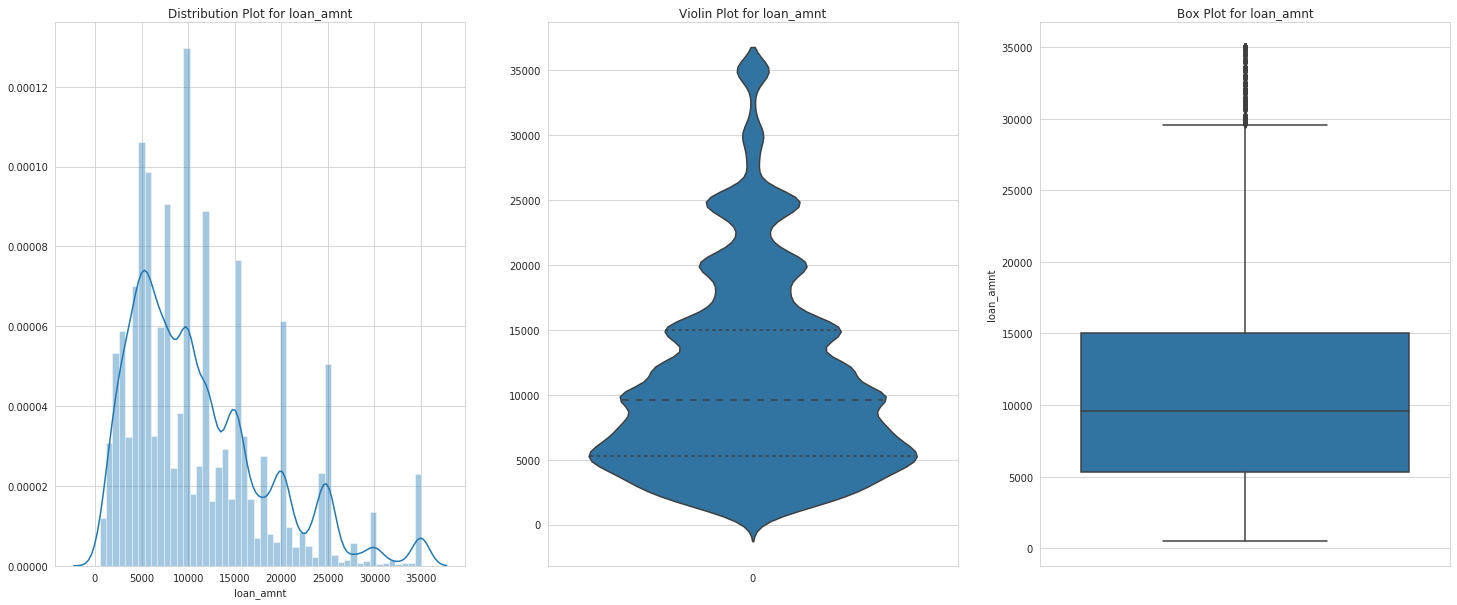

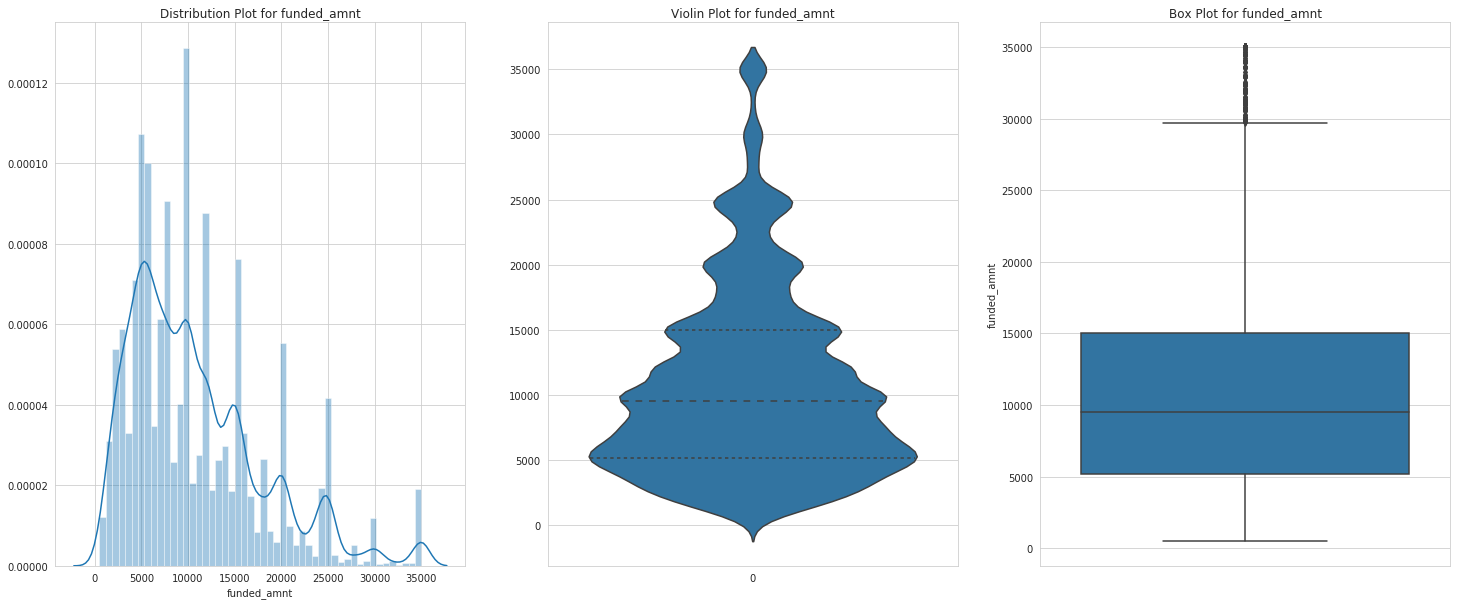

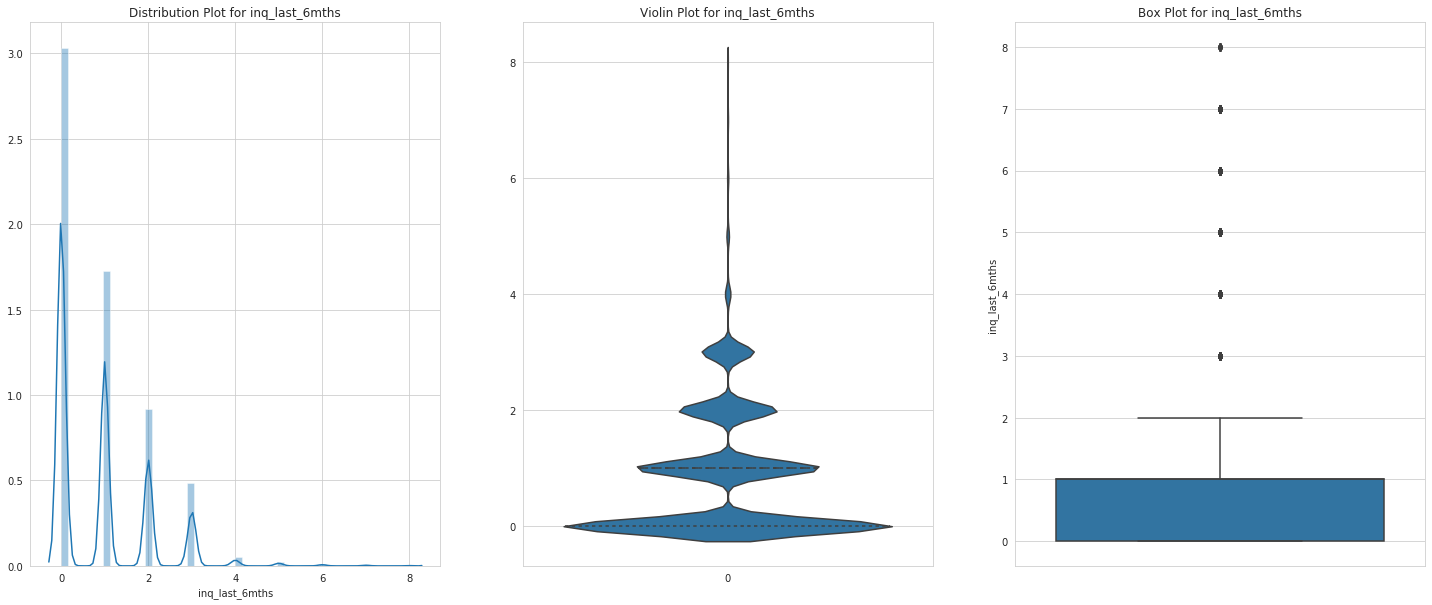

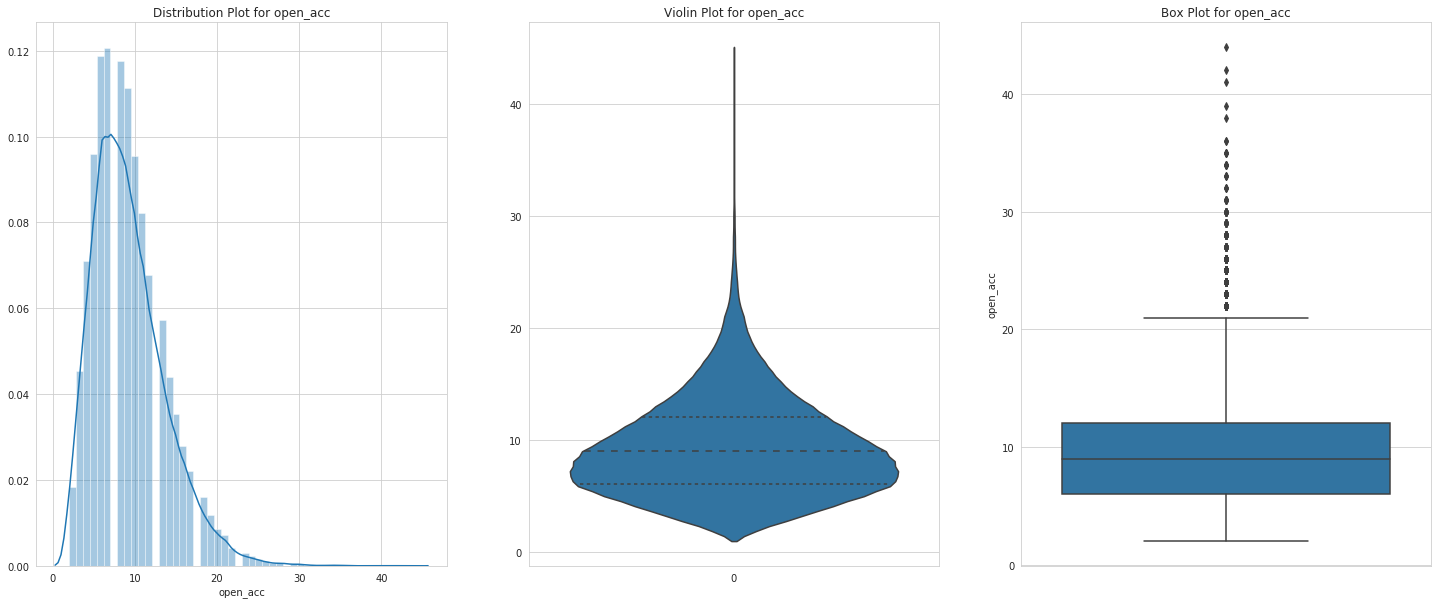

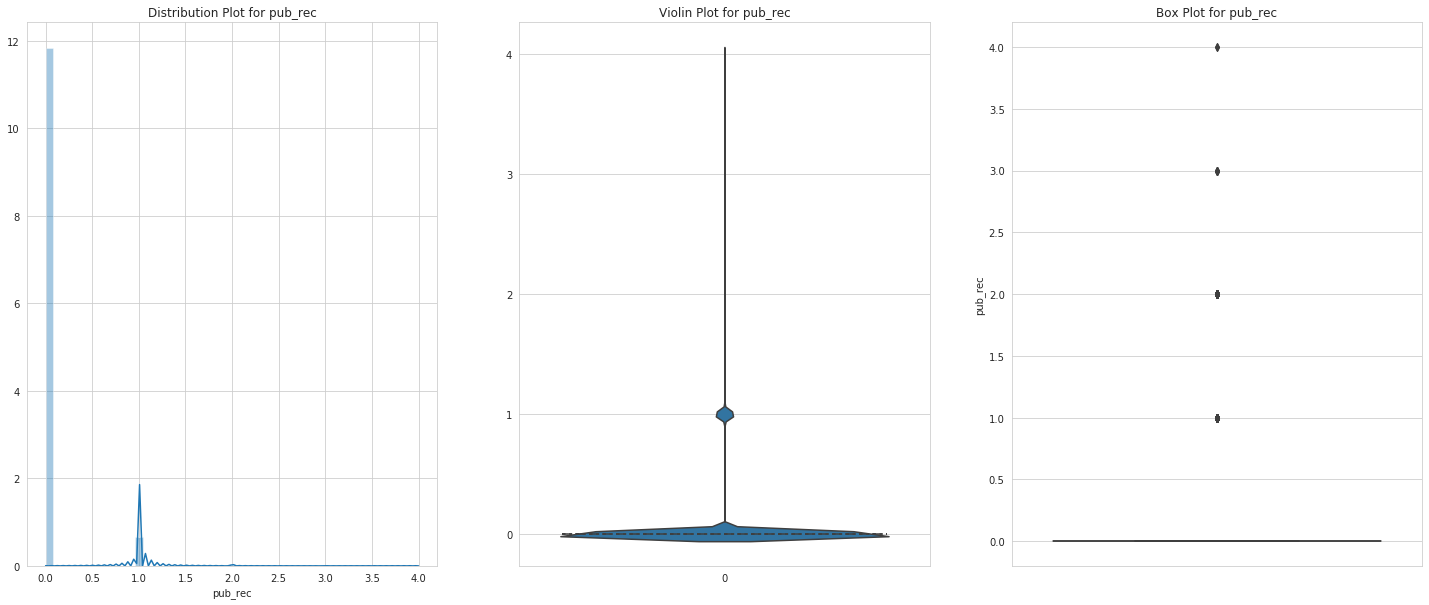

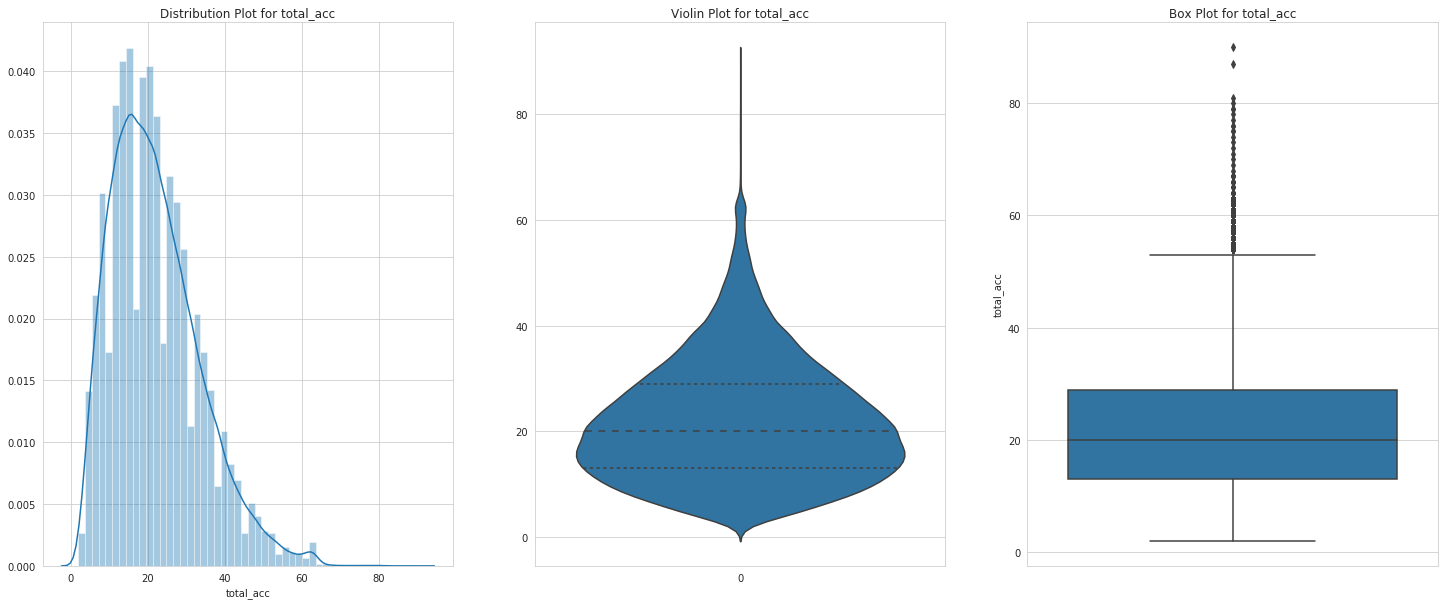

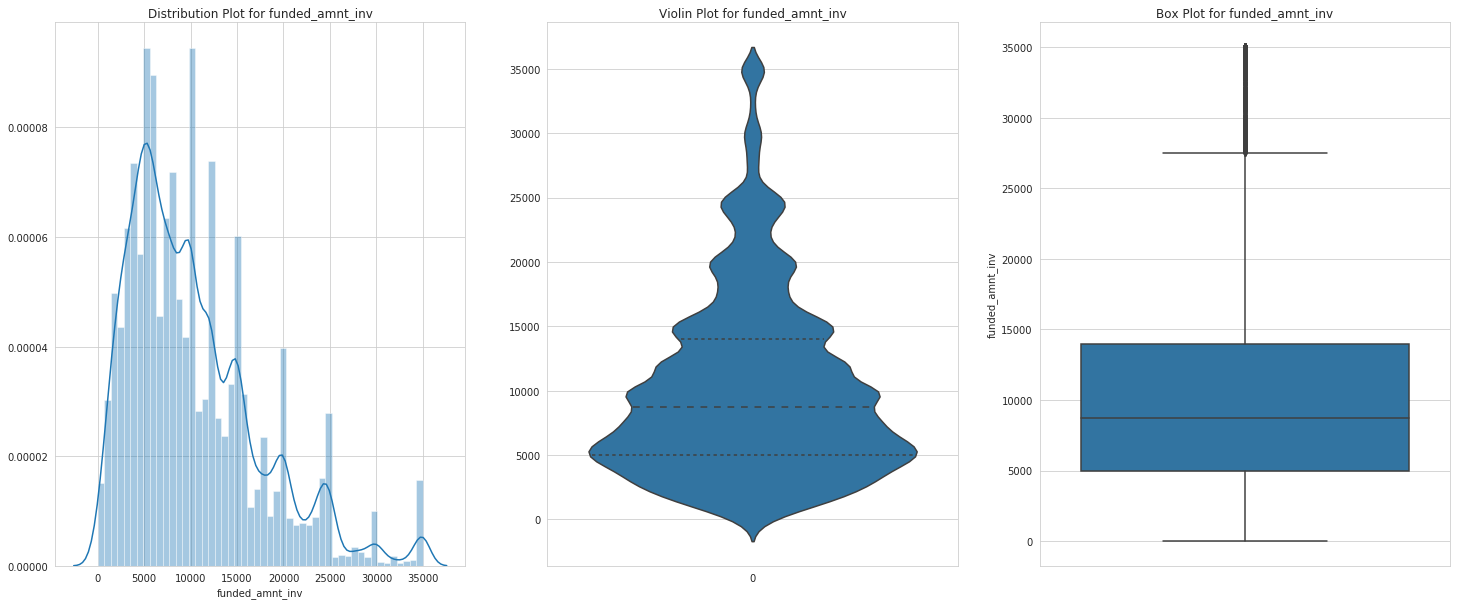

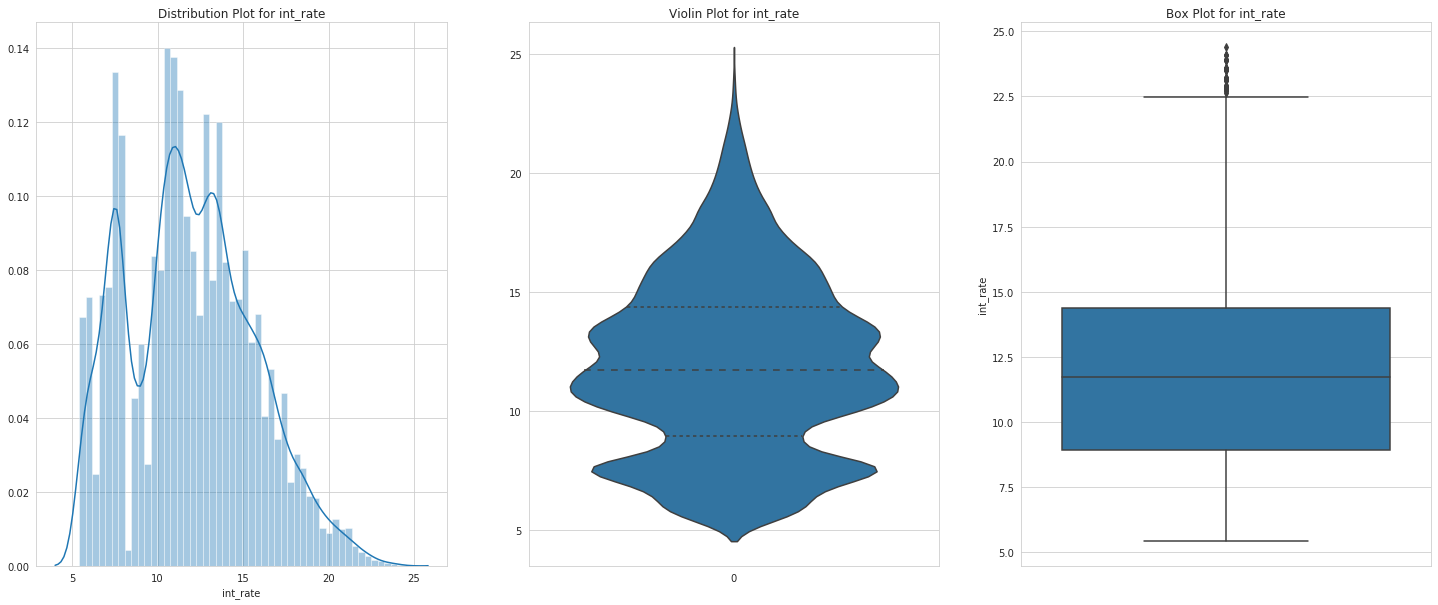

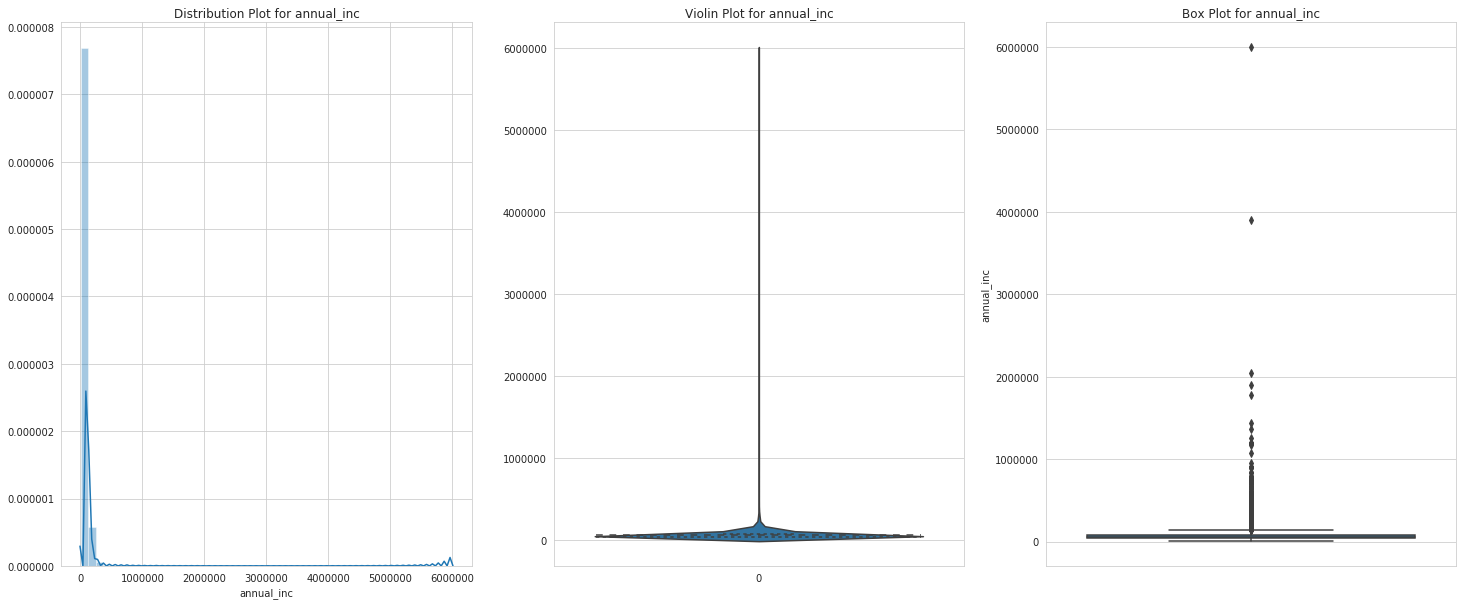

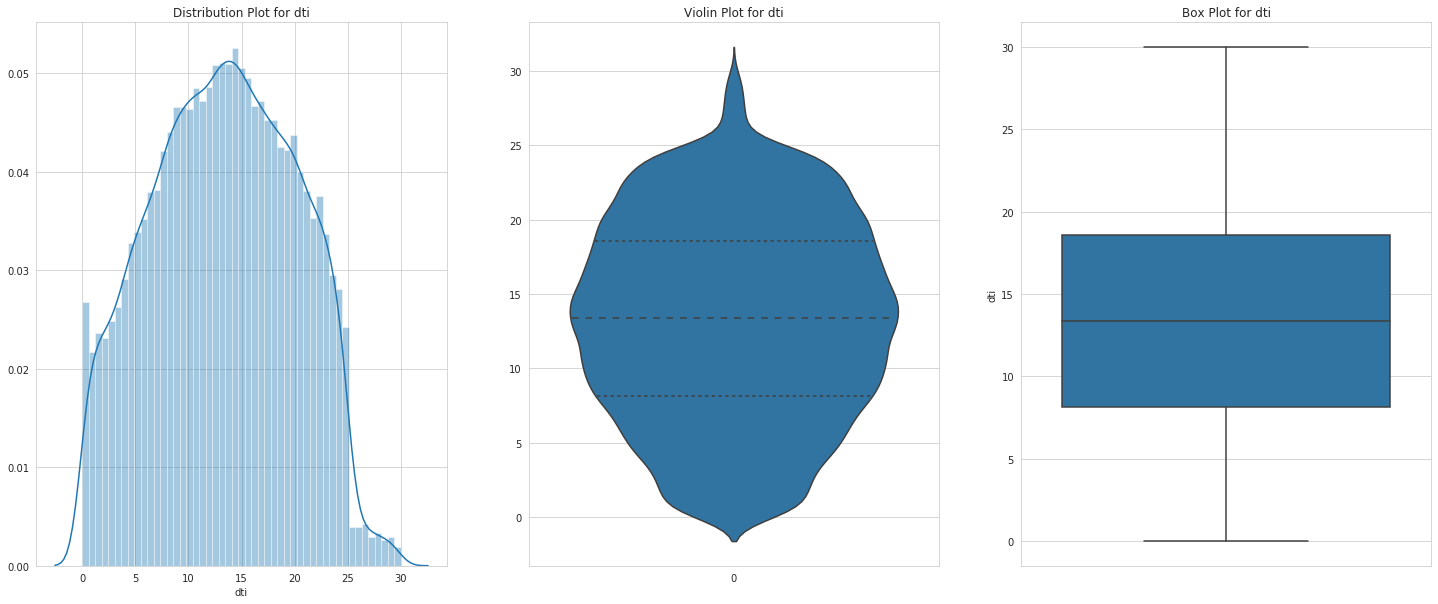

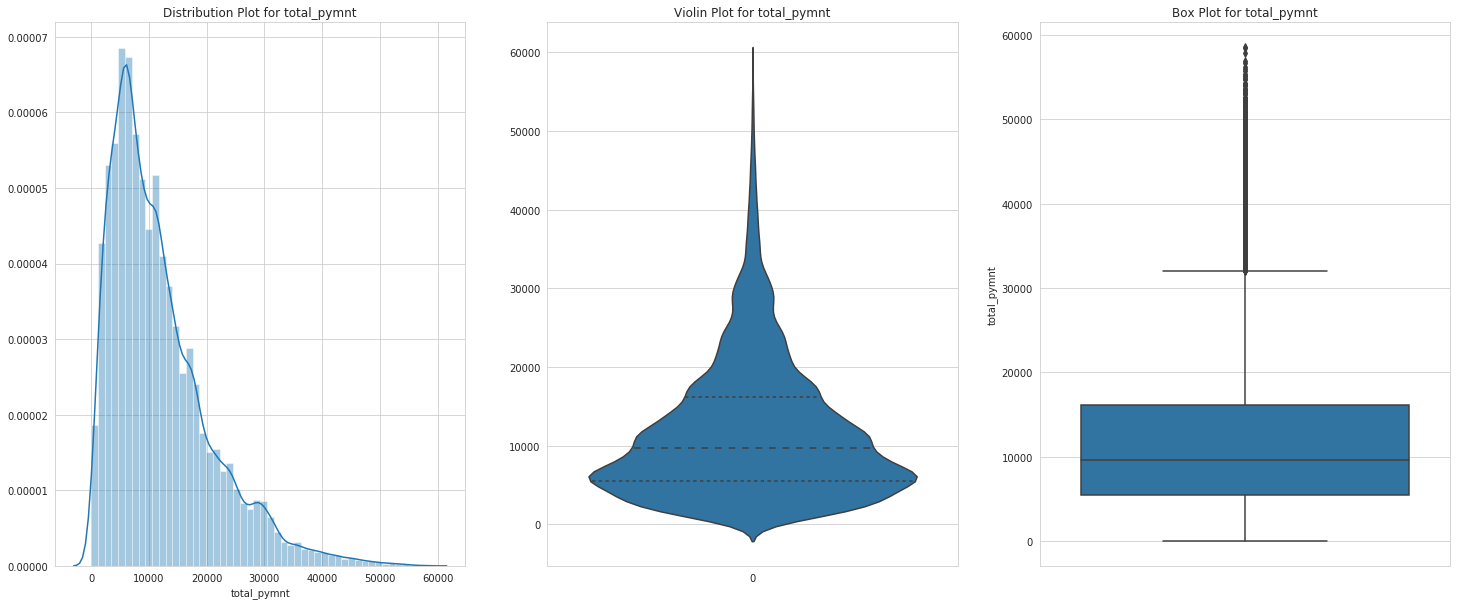

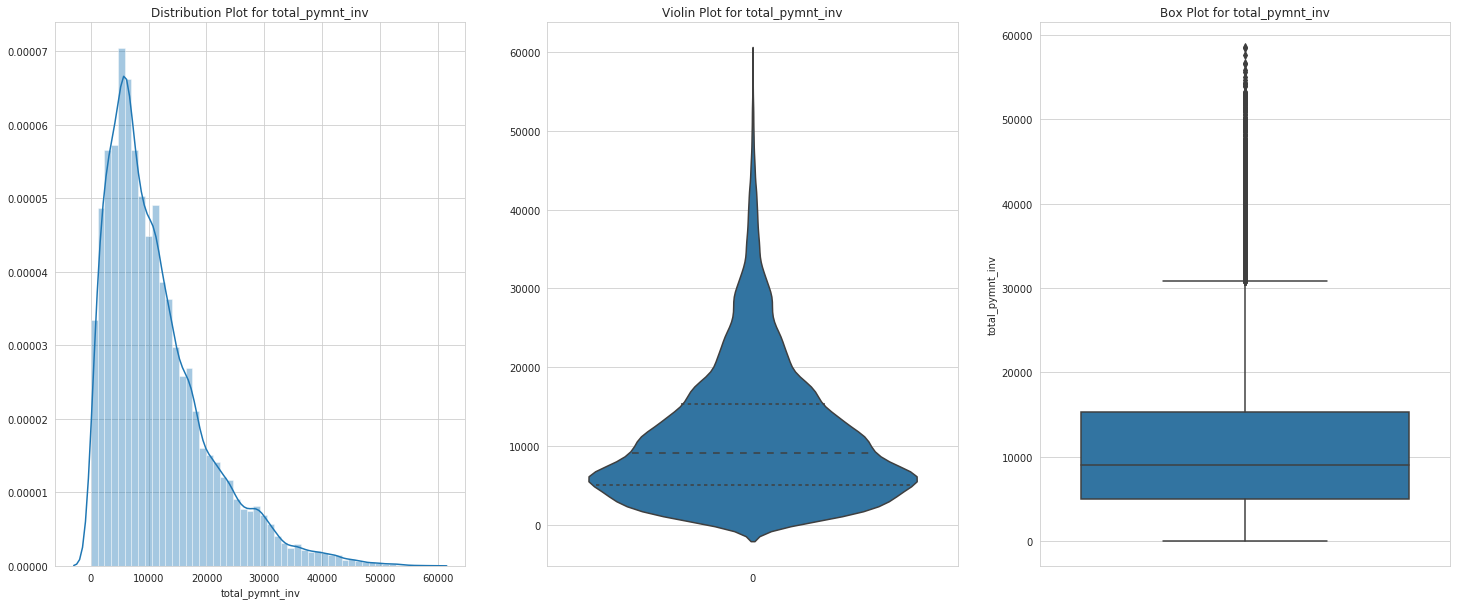

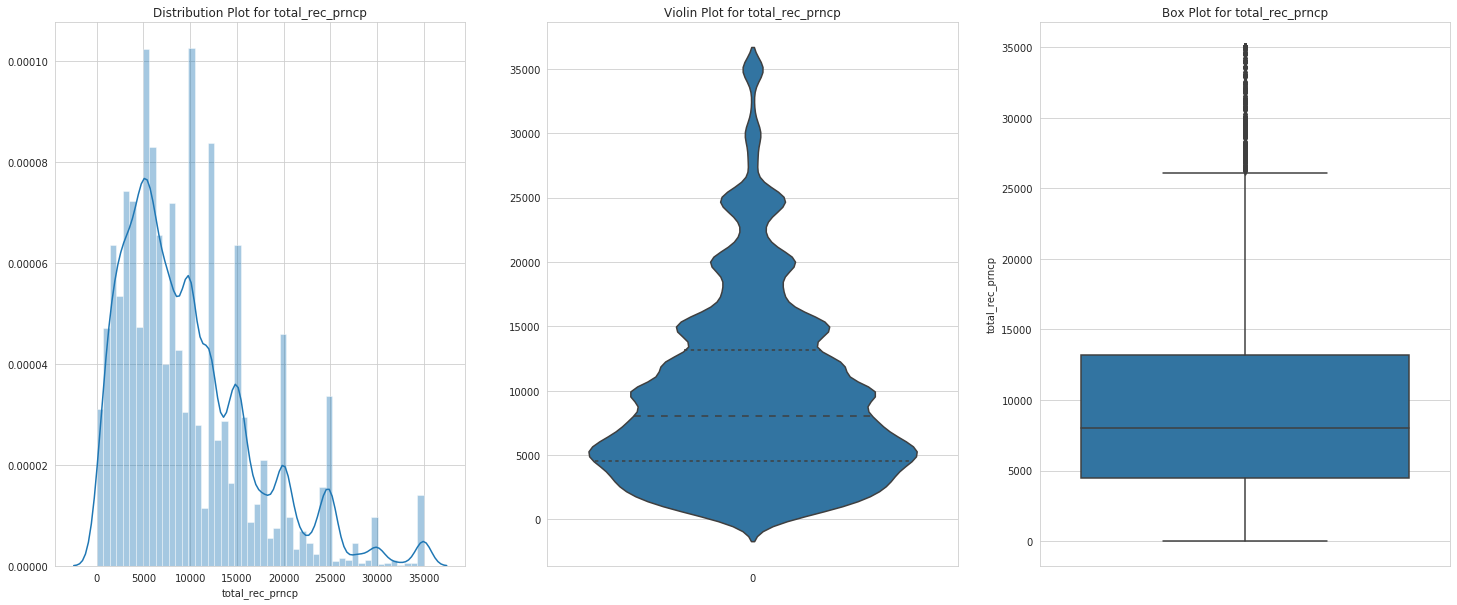

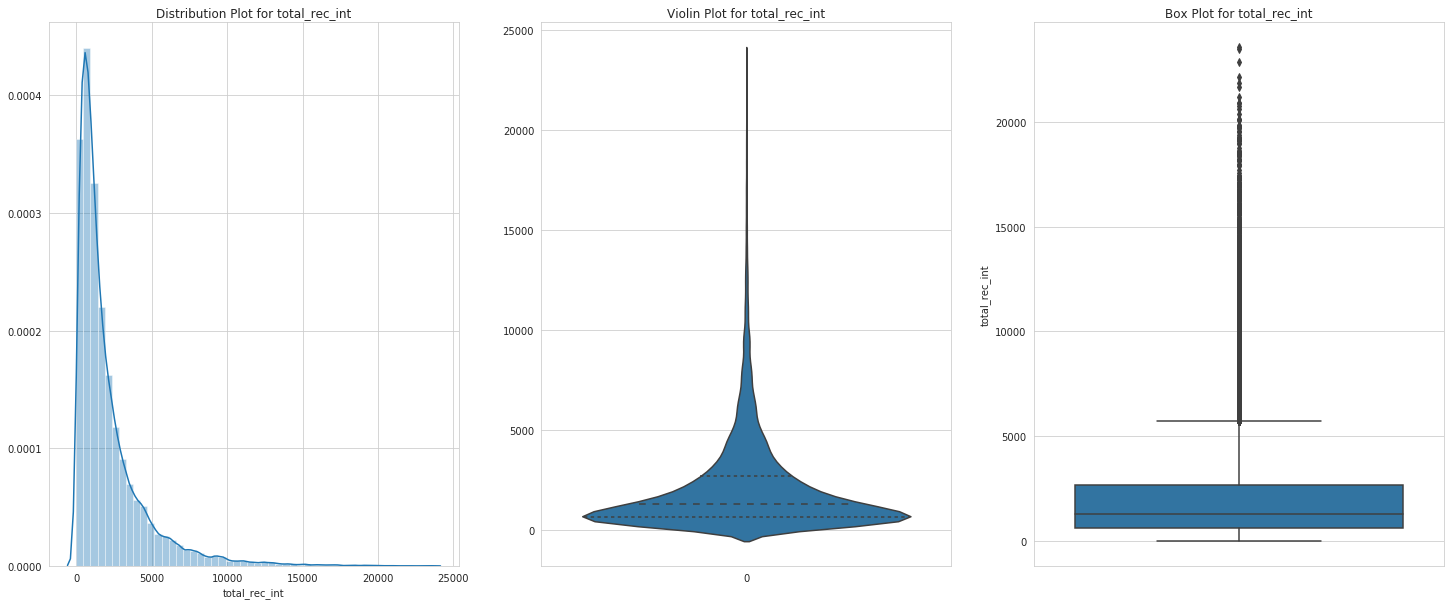

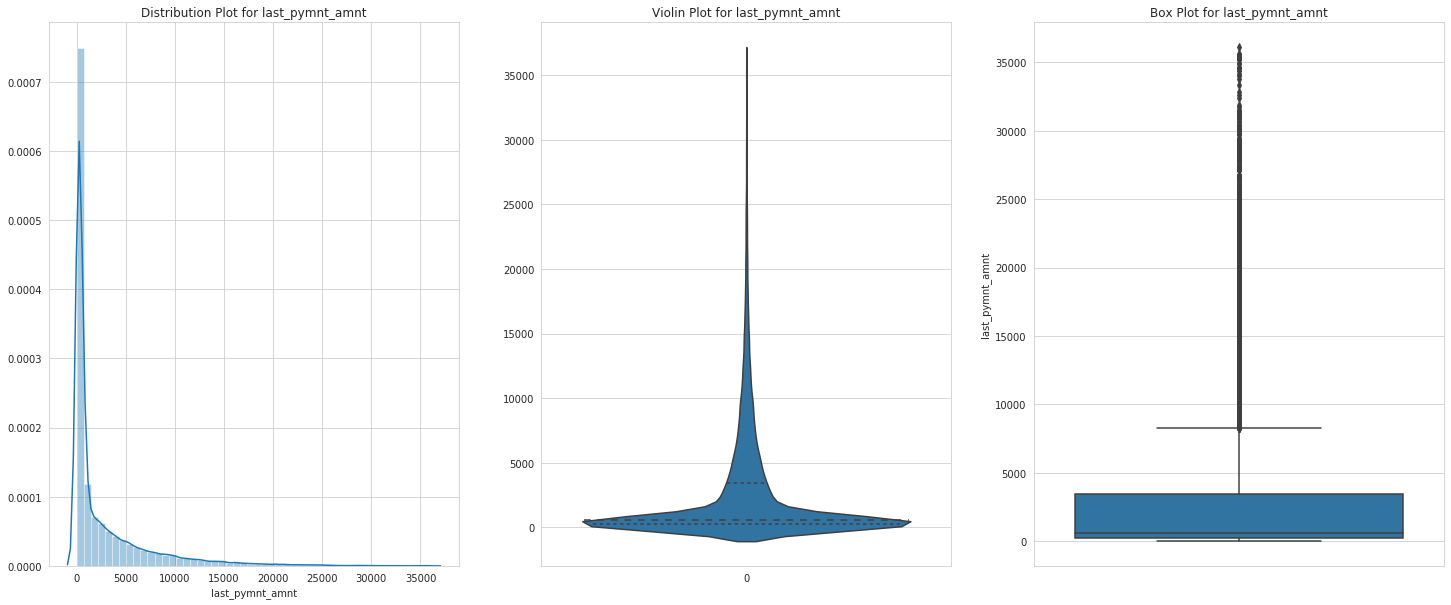

/home/quantiphi/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/quantiphi/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/quantiphi/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/quantiphi/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


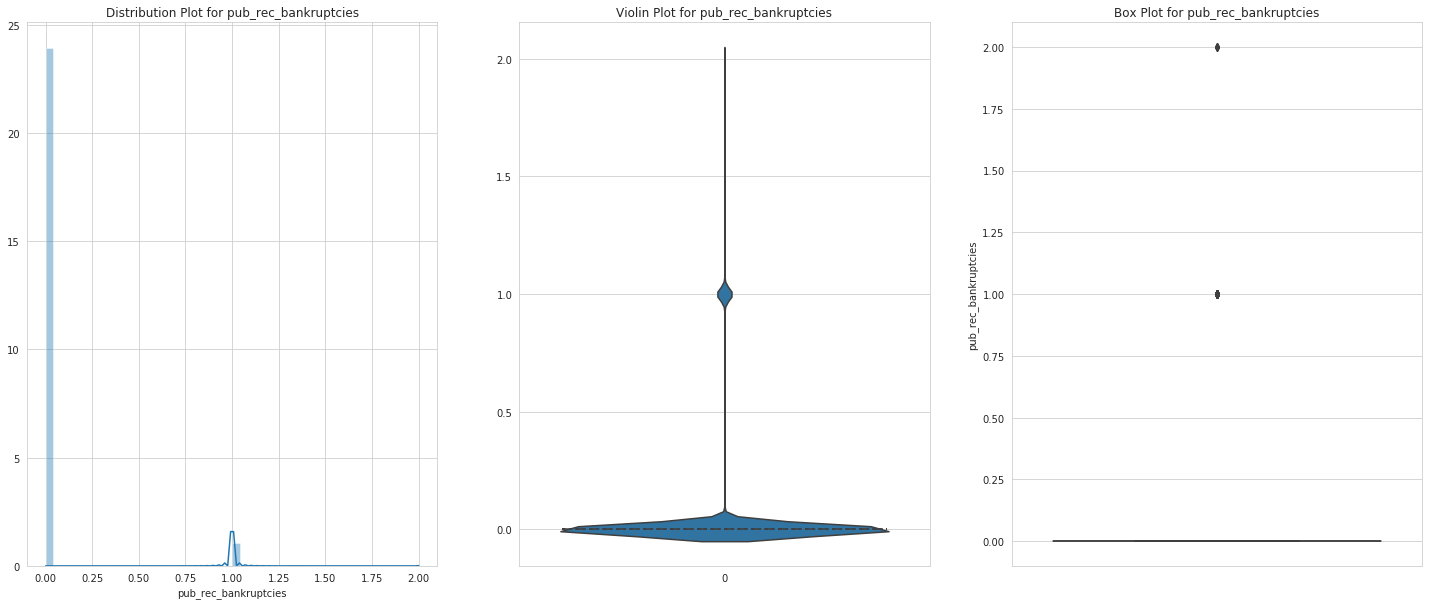

In [19]:
for i in list_continuous:
    plot_univariate_analysis_numeric(i) # Plotting for various continuous variables.

<font color='blue'> Insight : Analysis for above plots:<br>
1)loan amount lies between 6000-15000<br>
2)Funded amount range is 5500-15000<br>
3)Funded amount investment range is 5000-13000<br>
4)employement length of the loan seekers is between 2-9 years<br>
5)Number of derogatory public record is very less,mainly concentrated at centre<br>
6)Interest rate of the loan lies between 8.8-14 percent<br>
7)dti ratio lies between 8-18 </font>

##### 3.2 Univariate Analaysis for various categorical variables

Using bar to show count of various categorical variables

##### emp_title column : 
As we can see below that no of unique values are very large it will be difficult to show all values count on bar plot so taking top 50 vlaues and displaying it on bar plot.

In [20]:
df.emp_title.describe()

count       36191
unique      28027
top       US Army
freq          131
Name: emp_title, dtype: object

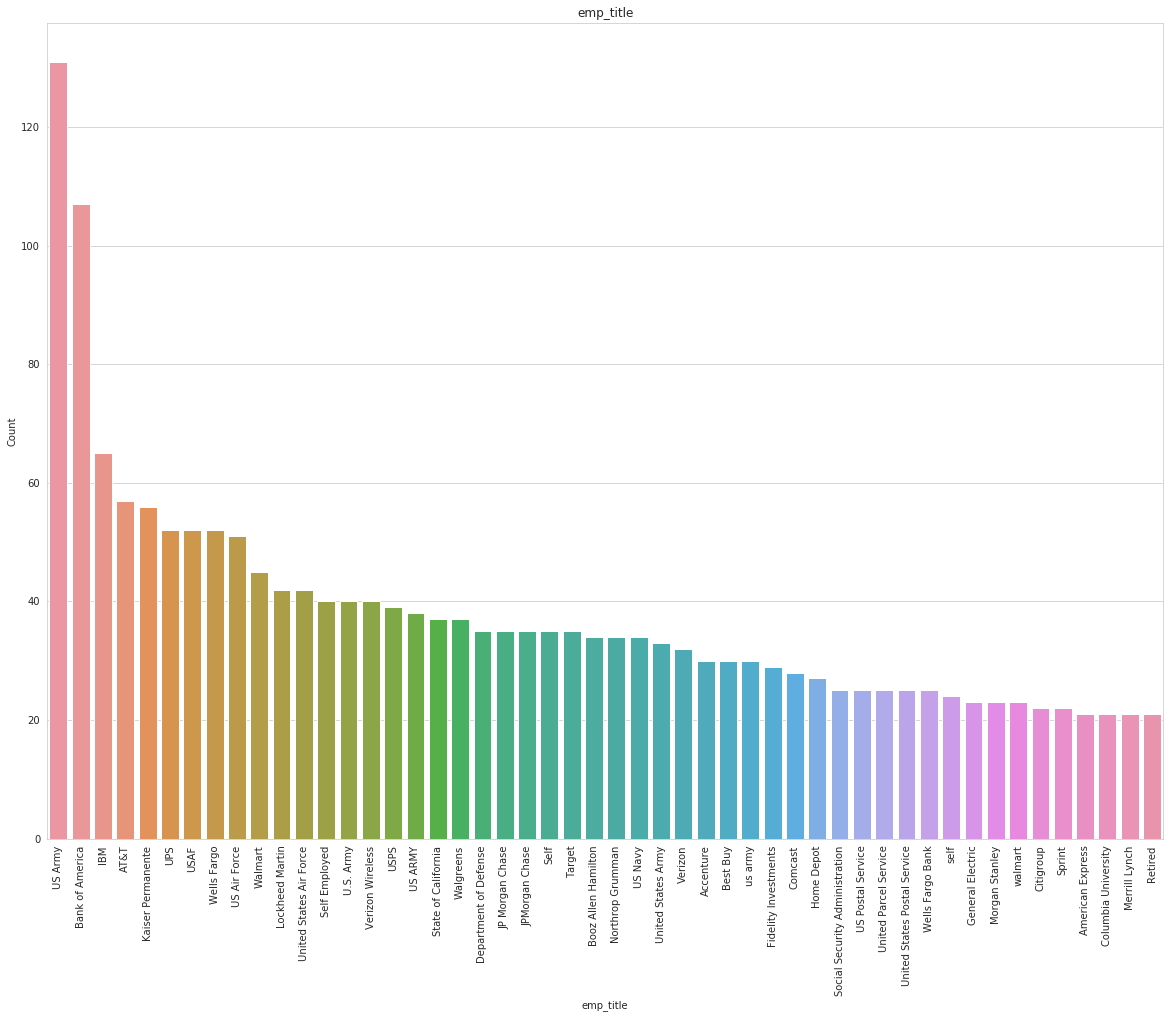

In [21]:
result = []
df_temp = df.groupby('emp_title') # Group by column name 
for key,item in df_temp:
    temp = {}
    temp['emp_title'] = key 
    temp['Count'] = item.emp_length.count() # Find length of column
    result.append(temp)
df_result = pd.DataFrame(result) # Create data frame
df_plot = df_result.nlargest(50,['Count']) # Finding top 50
plt.figure(figsize=(20, 15))
plt.title('emp_title')
g = sns.barplot(x='emp_title', y='Count', data=df_plot) # Plot using barplot
plt.xticks(rotation=90) # Name column vertically
plt.show()

<font color='blue'> Insight : Job title for which maximum loan is taken by the borrower is US Army. </font>

In [22]:
list_categorical.remove('emp_title')

##### title column : 
As we can see below that no of unique values are very large it will be difficult to show all values count on bar plot so taking top 50 vlaues and displaying it on bar plot.

In [23]:
df.title.describe()

count                  38566
unique                 19297
top       Debt Consolidation
freq                    2090
Name: title, dtype: object

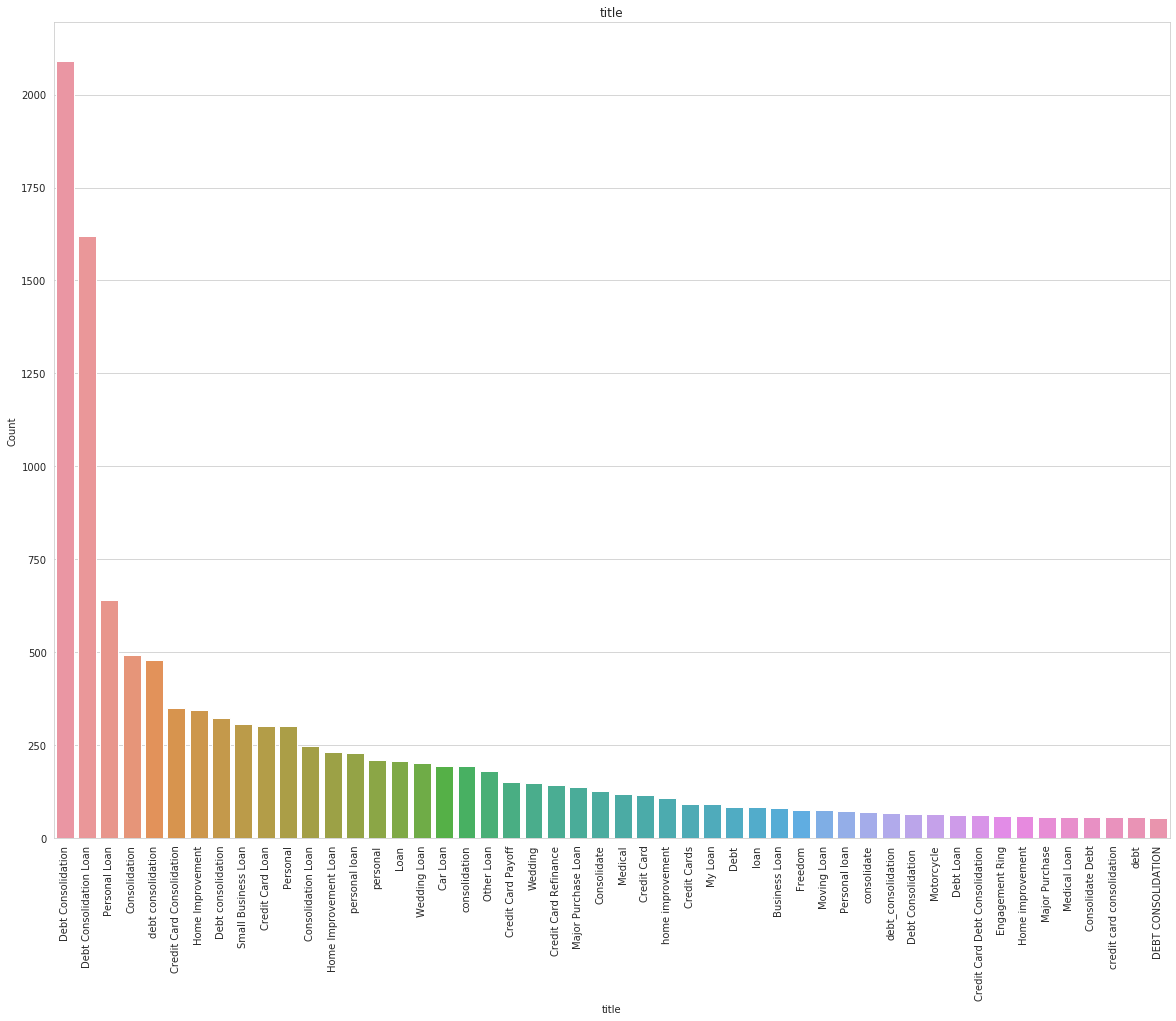

In [24]:
result = []
df_temp = df.groupby('title') # Group by column name 
for key,item in df_temp:
    temp = {}
    temp['title'] = key 
    temp['Count'] = item.emp_length.count() # Find length of column
    result.append(temp)
df_result = pd.DataFrame(result) # Create data frame
df_plot = df_result.nlargest(50,['Count']) # Finding top 50
plt.figure(figsize=(20, 15))
plt.title('title')
g = sns.barplot(x='title', y='Count', data=df_plot) # Plot using barplot
plt.xticks(rotation=90) # Name column vertically
plt.show()

<font color='blue'> Insight : Loan title with maximum count of loan is Debt Consolidation. </font>

In [25]:
list_categorical.remove('title')

##### earliest_cr_line column : 
As we can see below that no of unique values are very large it will be difficult to show all values count on bar plot so taking top 50 vlaues and displaying it on bar plot.

In [26]:
df.earliest_cr_line.describe()

count      38577
unique       524
top       Oct-99
freq         360
Name: earliest_cr_line, dtype: object

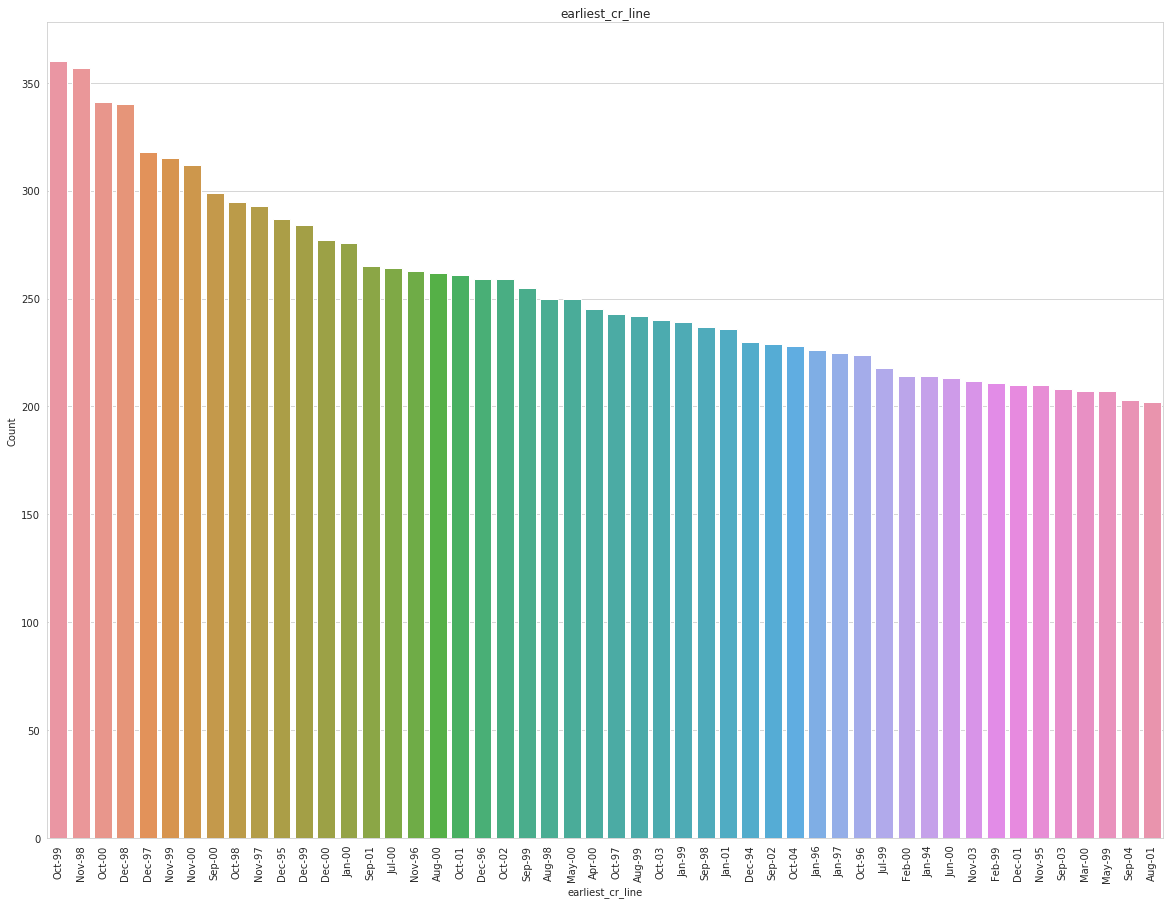

In [27]:
result = []
df_temp = df.groupby('earliest_cr_line') # Group by column name 
for key,item in df_temp:
    temp = {}
    temp['earliest_cr_line'] = key 
    temp['Count'] = item.emp_length.count() # Find length of column
    result.append(temp)
df_result = pd.DataFrame(result) # Create data frame
df_plot = df_result.nlargest(50,['Count']) # Finding top 50
plt.figure(figsize=(20, 15))
plt.title('earliest_cr_line')
g = sns.barplot(x='earliest_cr_line', y='Count', data=df_plot) # Plot using barplot
plt.xticks(rotation=90) # Name column vertically
plt.show()

<font color='blue'> Insight : The month the borrower's earliest reported credit line was opened is october-99. </font>

In [28]:
list_categorical.remove('earliest_cr_line') # Removing from list

##### last_credit_pull_d column : 
As we can see below that no of unique values are very large it will be difficult to show all values count on bar plot so taking top 50 vlaues and displaying it on bar plot.

In [29]:
df.last_credit_pull_d.describe()

count      38575
unique       106
top       May-16
freq        9333
Name: last_credit_pull_d, dtype: object

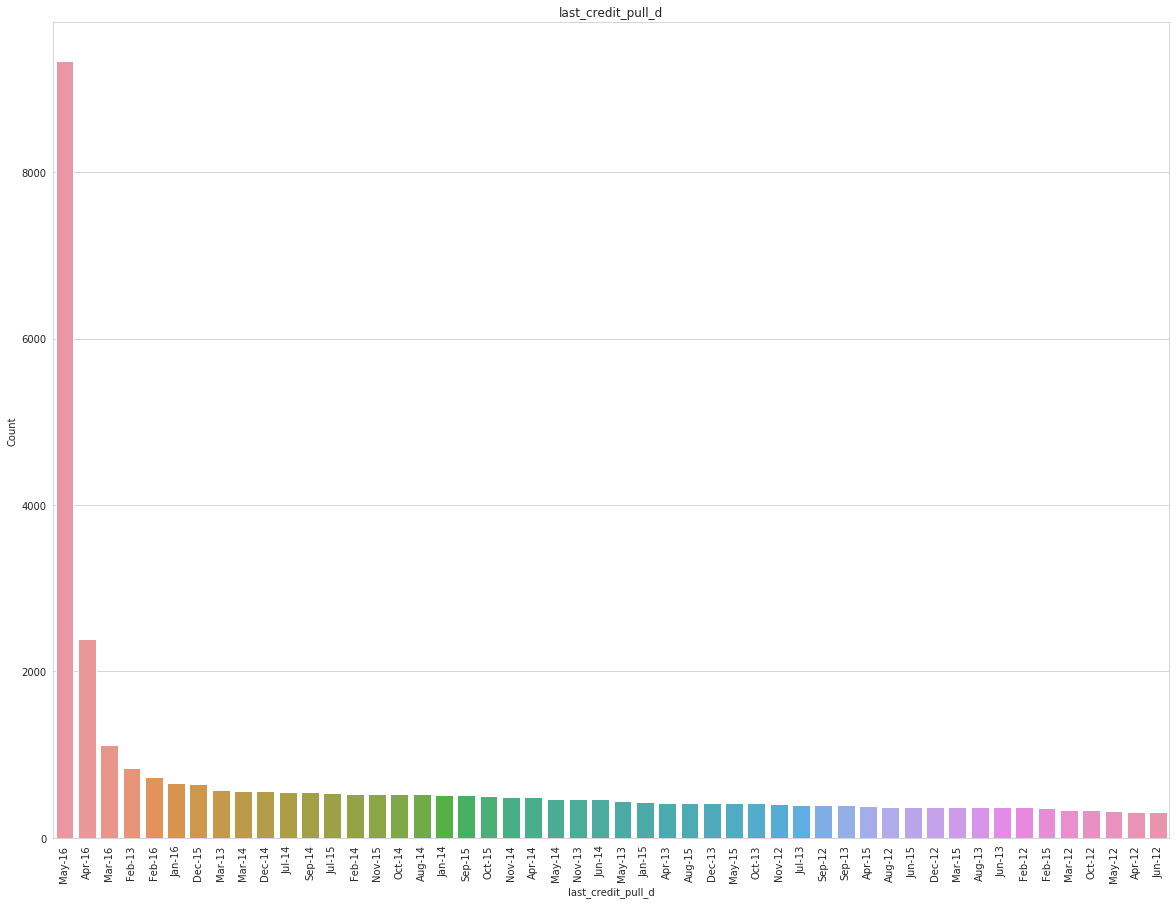

In [30]:
result = []
df_temp = df.groupby('last_credit_pull_d') # Group by column name 
for key,item in df_temp:
    temp = {}
    temp['last_credit_pull_d'] = key 
    temp['Count'] = item.emp_length.count() # Find length of column
    result.append(temp)
df_result = pd.DataFrame(result) # Create data frame
df_plot = df_result.nlargest(50,['Count']) # Finding top 50
plt.figure(figsize=(20, 15))
plt.title('last_credit_pull_d')
g = sns.barplot(x='last_credit_pull_d', y='Count', data=df_plot) # Plot using barplot
plt.xticks(rotation=90) # Name column vertically
plt.show()

<font color='blue'> Insight : The most recent month LC pulled credit for this loan is May-16.</font>

In [31]:
list_categorical.remove('last_credit_pull_d')

Plotting graph for rest of values

In [32]:
def plot_univariate_analysis_categorical(column_name):
    """Function to plot frequency of various categorical variables using bar plot"""
    result = []
    df_temp = df.groupby(column_name) # Group by column name 
    for key,item in df_temp:
        temp = {}
        temp[column_name] = key 
        temp['Count'] = item.emp_length.count() # Find length of column
        result.append(temp)
    df_plot = pd.DataFrame(result) # Create data frame
    plt.figure(figsize=(20, 15))
    plt.title(column_name)
    g = sns.barplot(x=column_name, y='Count', data=df_plot) # Plot using barplot
    for index, row in df_plot.iterrows():
        g.text(row.name,row.Count, round(row.Count,2), color='black', ha="center")
    plt.xticks(rotation=90) # Name column vertically
    plt.show()

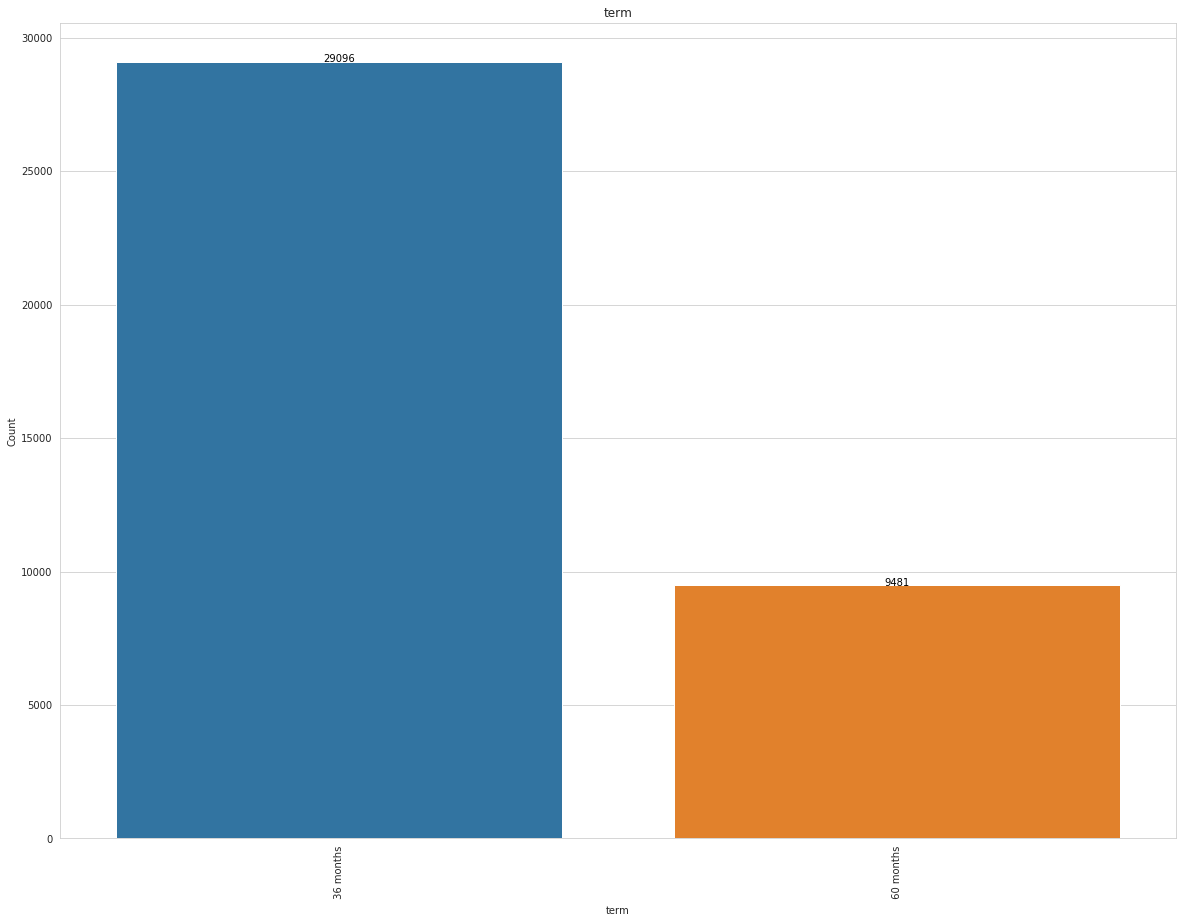

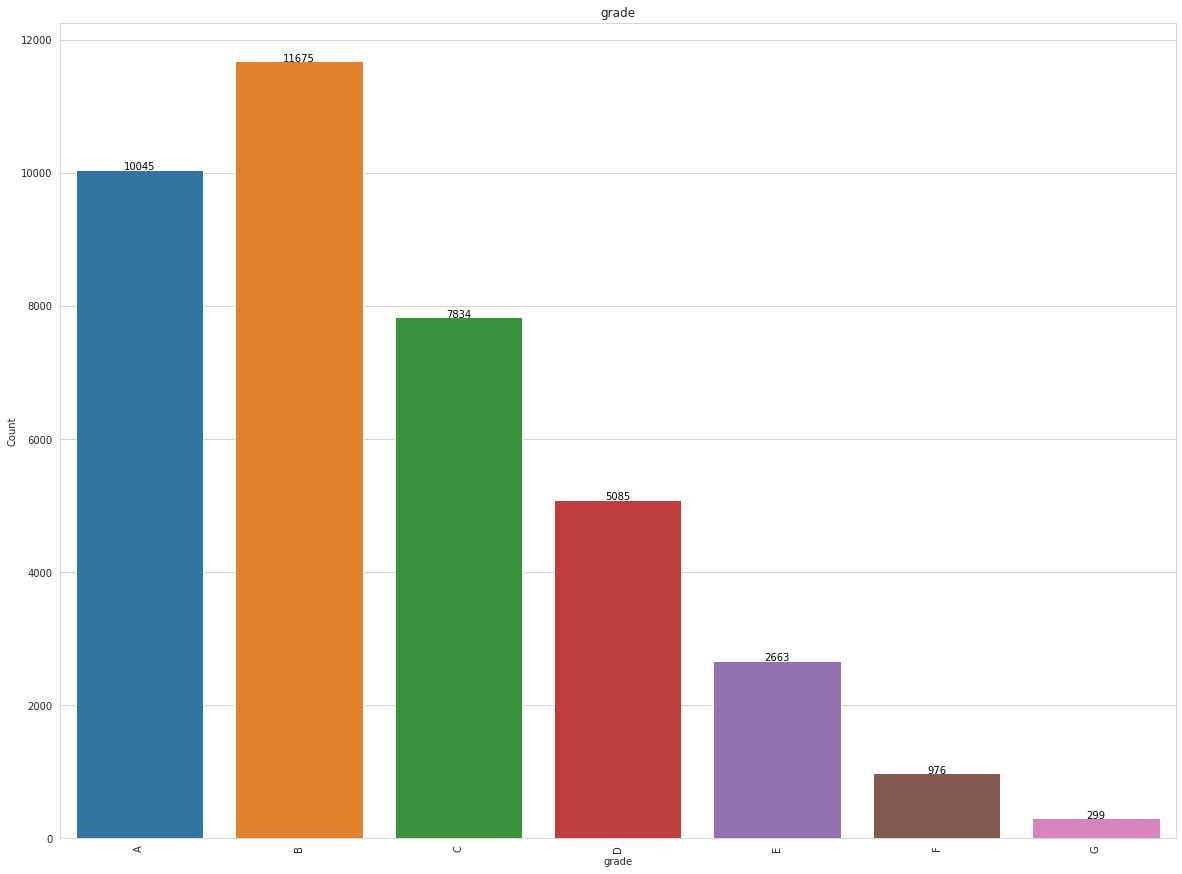

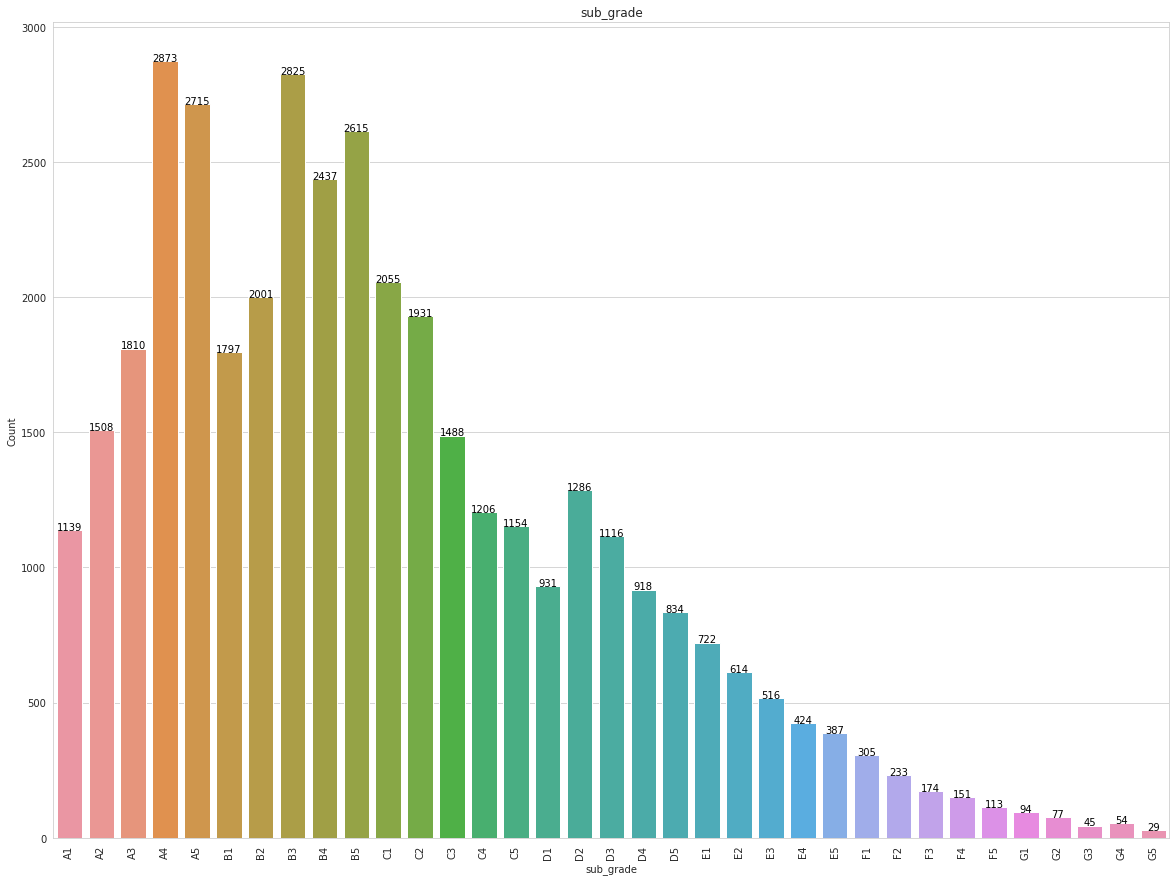

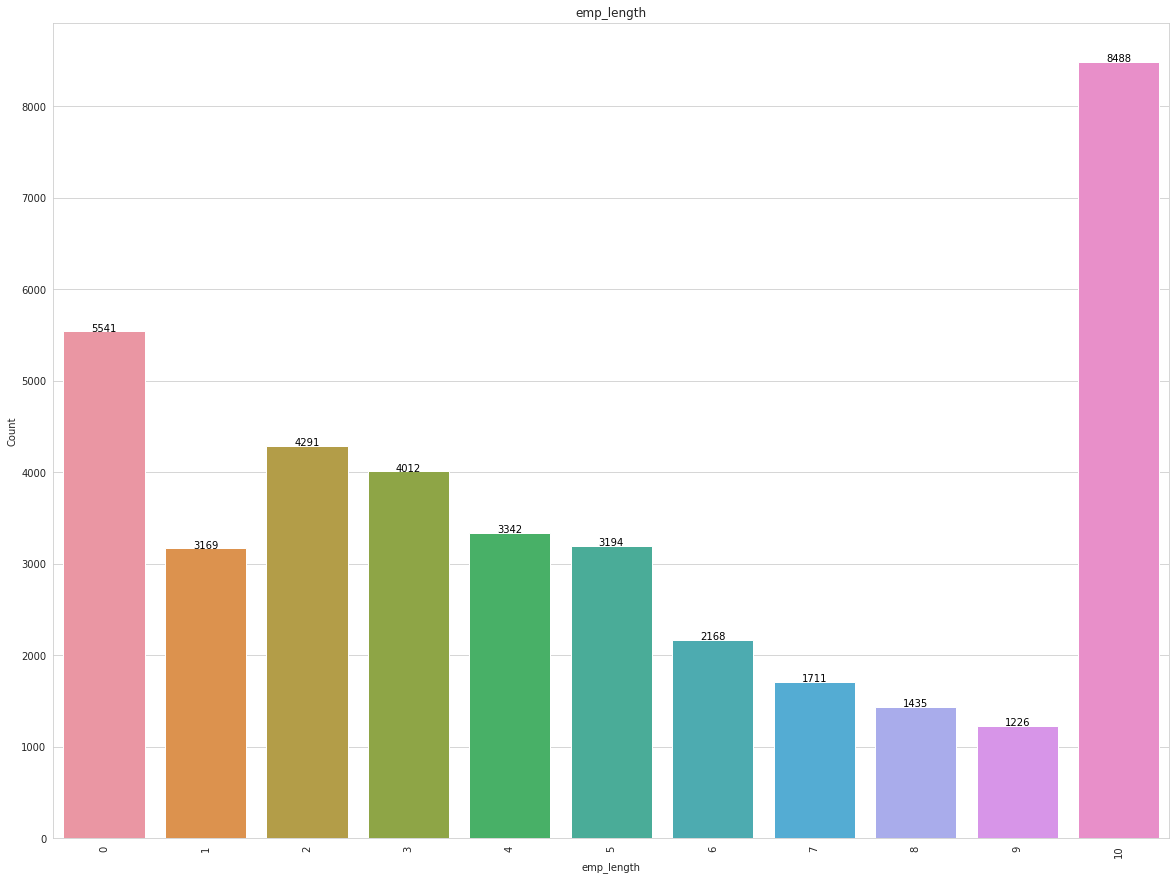

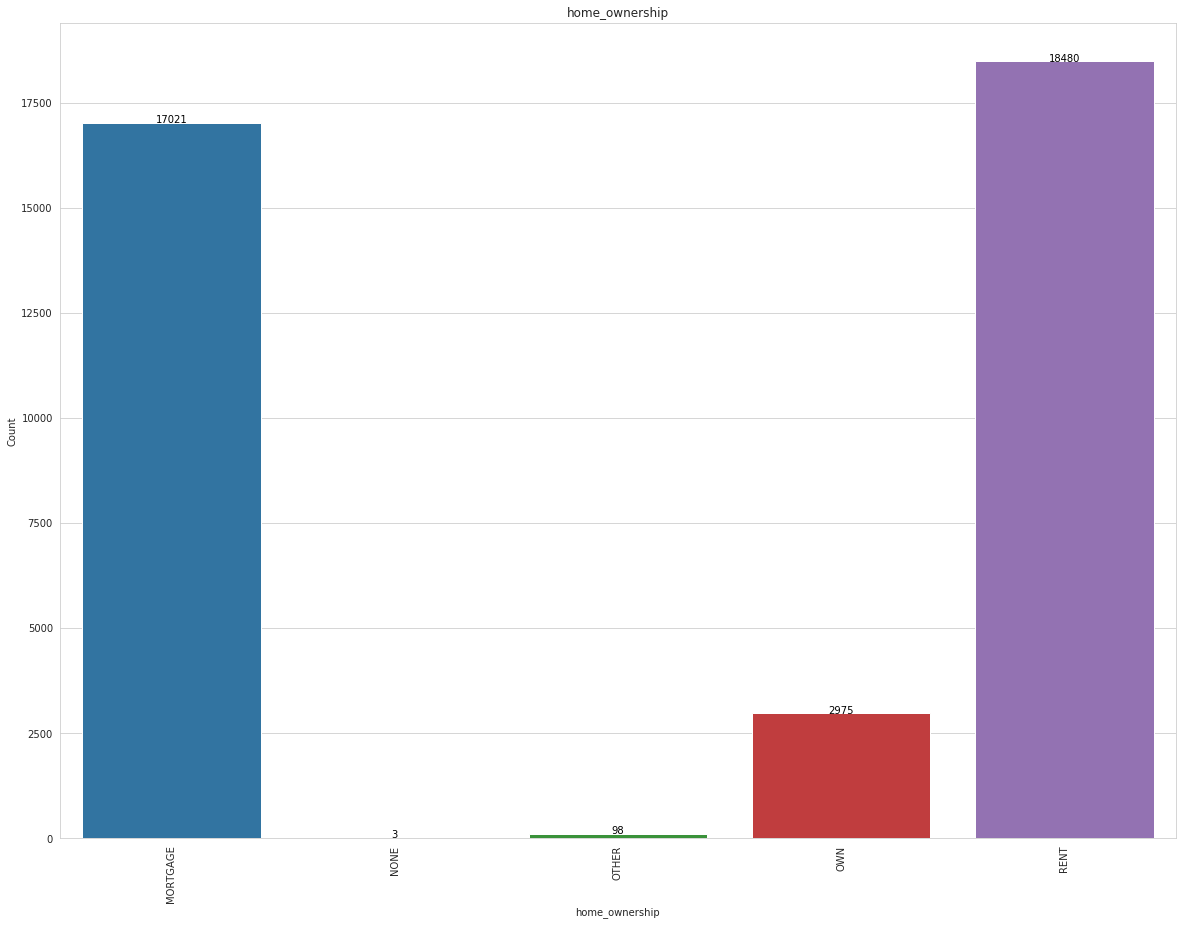

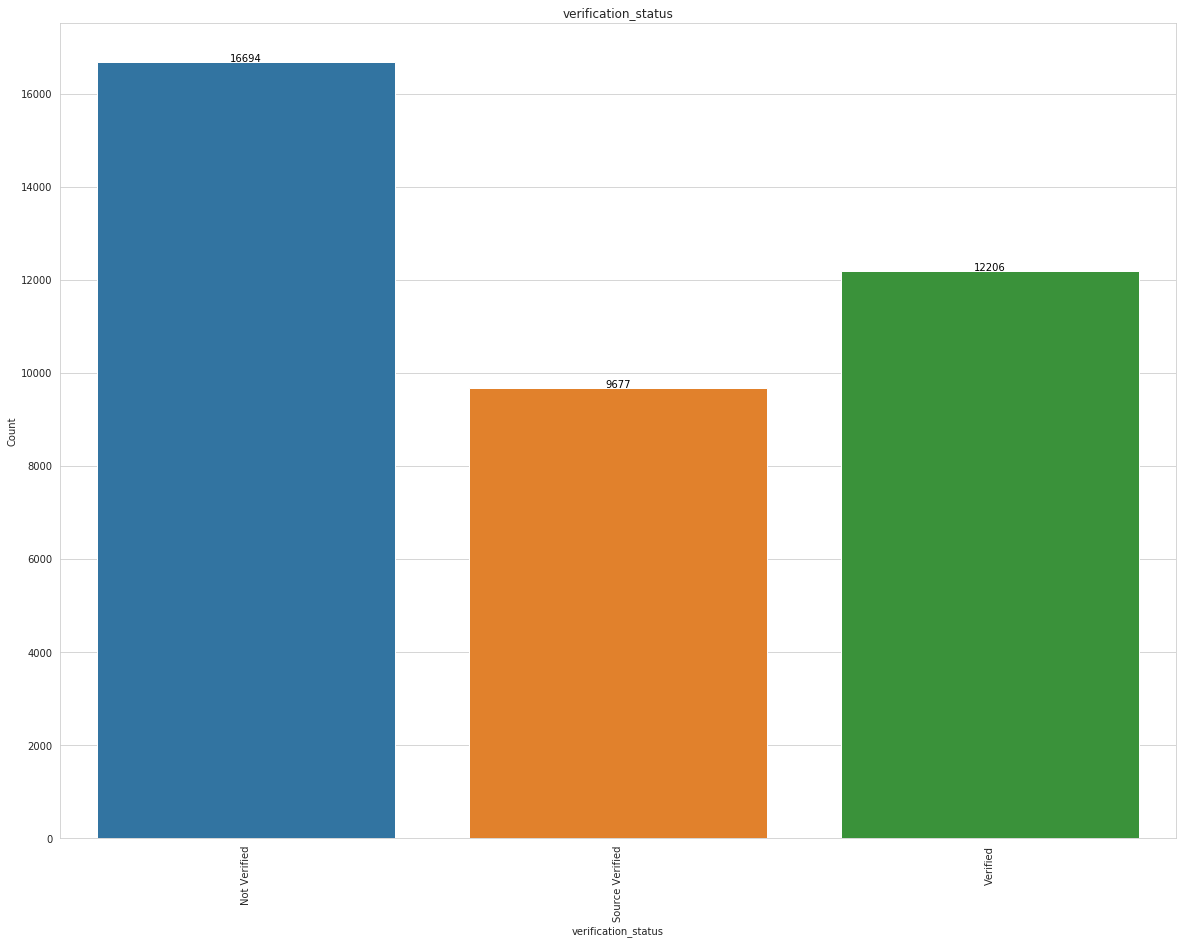

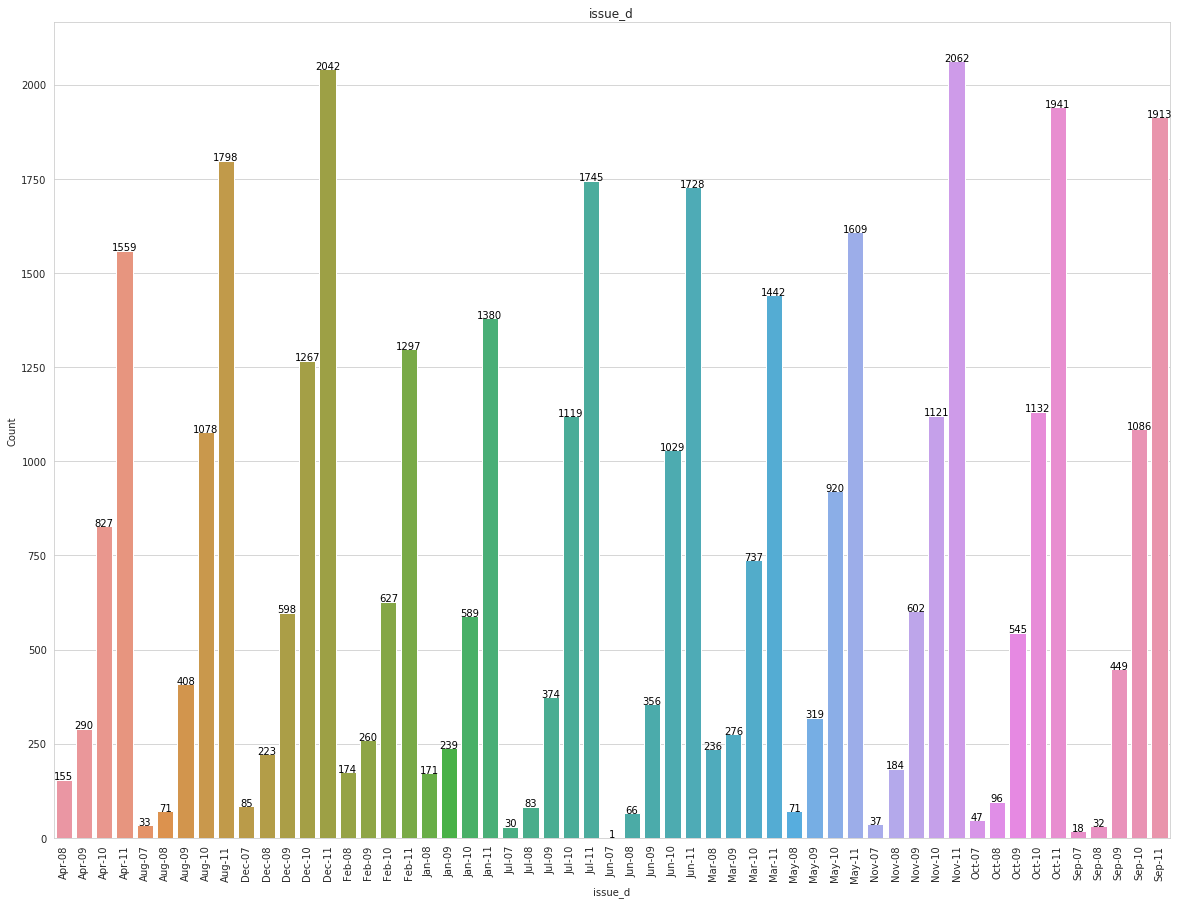

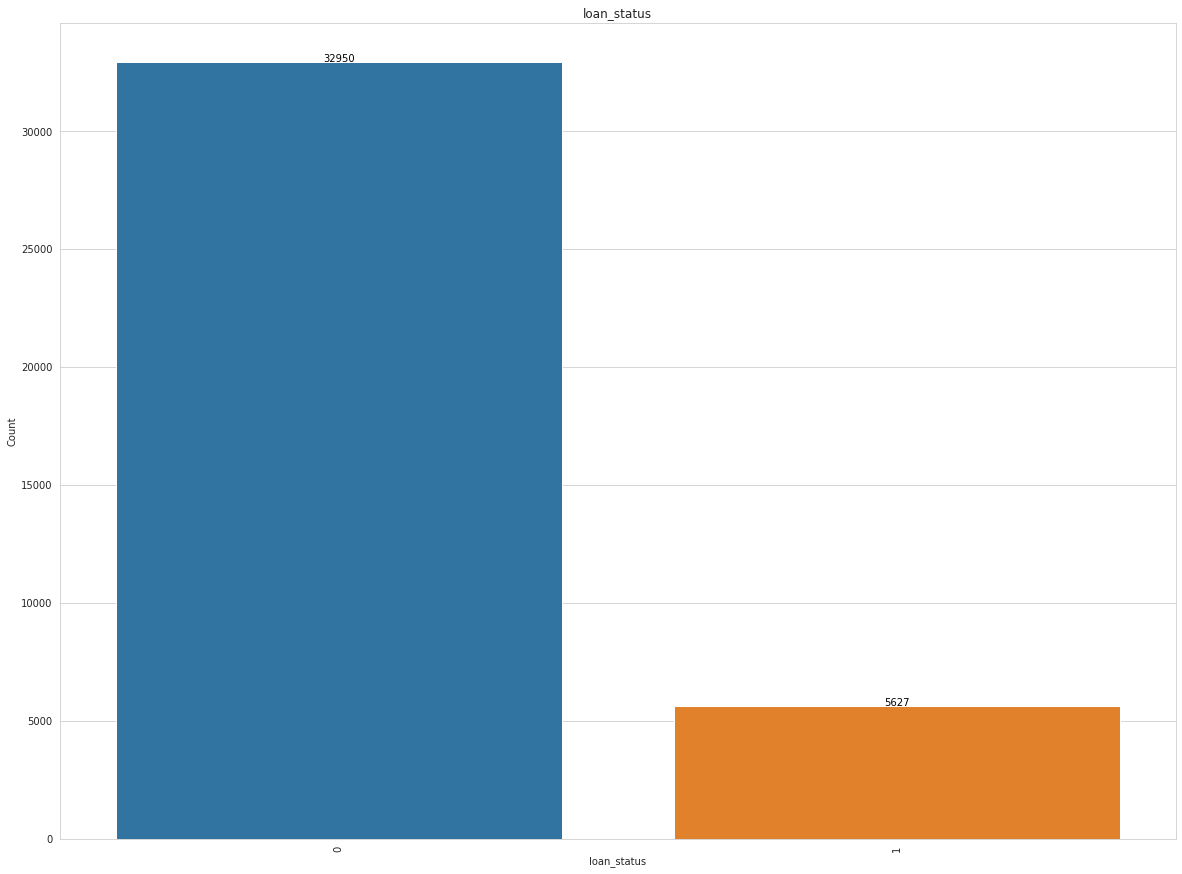

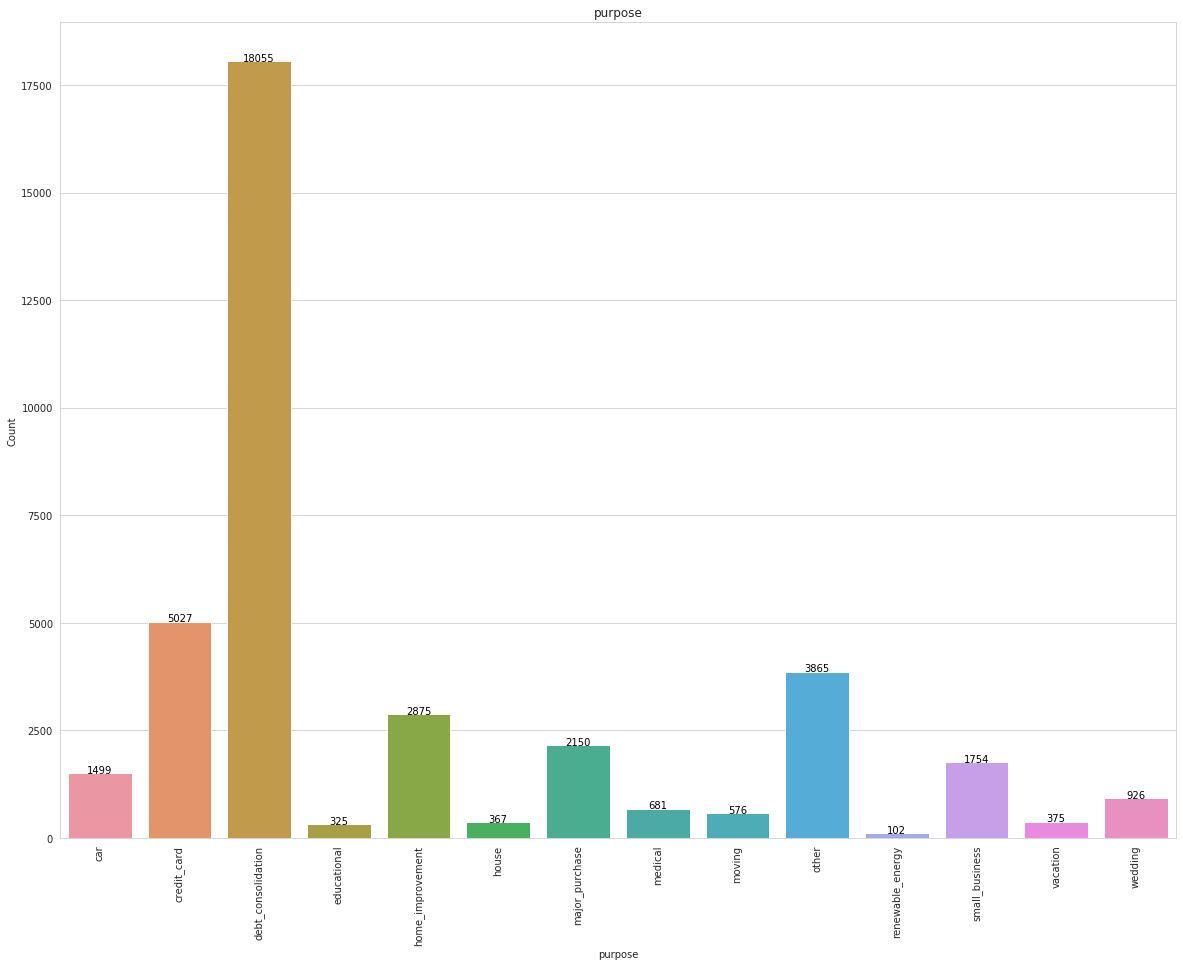

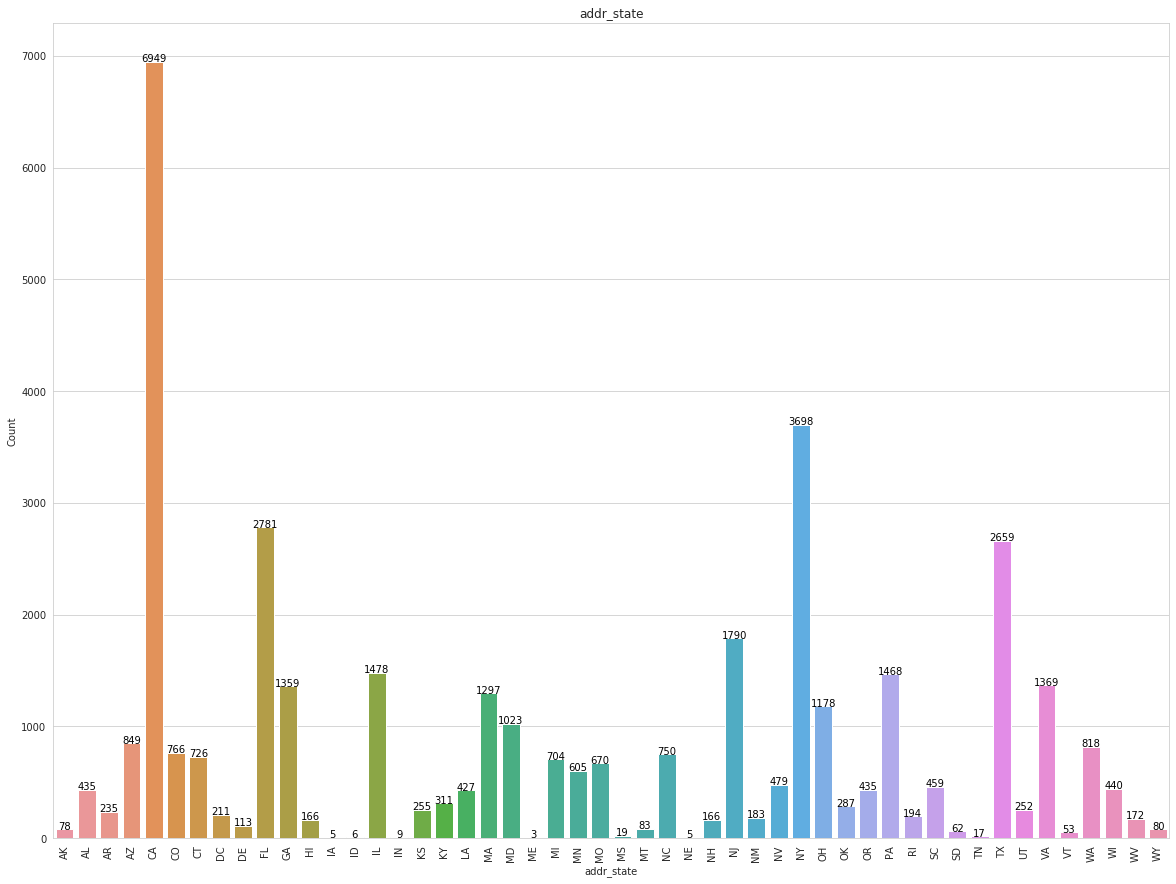

In [33]:
for i in list_categorical:
    plot_univariate_analysis_categorical(i) # Drawing bar plot for categorical variables using bar plot

<font color='blue'> Insight : Analysis for above plots <br>
1)term for 36 months has more loan compared to 60 months<br>
2)Loan for Grade B is maximum with count 11675<br>
3)For grade B ,B3 subgrade has max loan count<br>
4)Loan count for Rent is maximum<br>
5)There are 16694 loans which are not verified<br>
6)Loan issue date is maximum in Nov-11<br>
7)Loan status:Fully paid loan count is 32950,charged off loans count is 5627<br>
8)Most of the loans are taken for debt_consolidation purpose<br>
9)Address of state where most of the loans are taken is CA<br> </font>

#### 3.3 Binning various contionuos varibales and deriving various segments to draw more insights on various segements of distribution

Drawing count plot for loan_year derived from issue_d

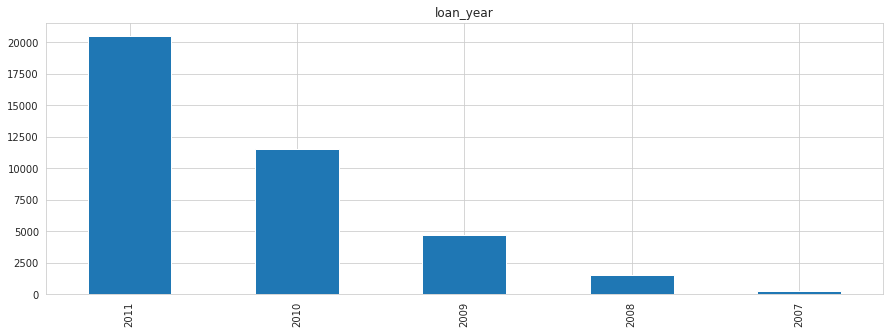

In [34]:
df['loan_year'] = df.issue_d.apply(lambda x : '20'+x.split('-')[1]) # Extracting loan issued year
plt.figure(figsize = (15,5))
plt.title("loan_year")
df.loan_year.value_counts().plot(kind = 'bar') # Plotting barplot
plt.xticks(rotation=90)
plt.show()
list_categorical.append('loan_year')

<font color='blue'> Insight : Loan year with maximum loan is 2011. </font>

Drawing count plot for loan_month derived from issue_d

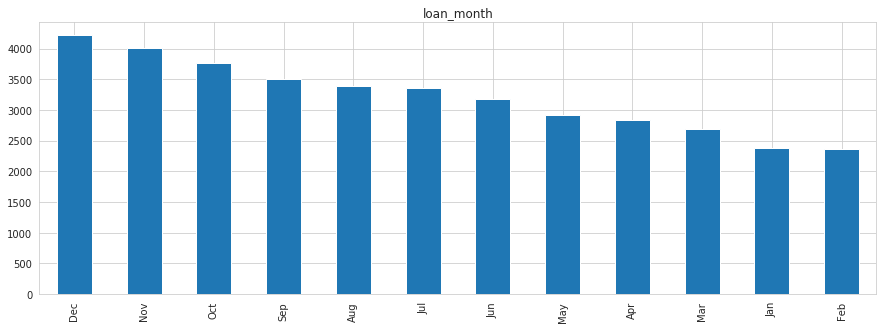

In [35]:
df['loan_month'] = df.issue_d.apply(lambda x : x.split('-')[0])
plt.figure(figsize = (15,5))
plt.title("loan_month")
df.loan_month.value_counts().plot(kind = 'bar') # Plotting barplot
plt.xticks(rotation=90)
plt.show()
list_categorical.append('loan_month')

<font color='blue'> Insight : Max loan is taken in december month. </font>

Plotting bins for loan amount

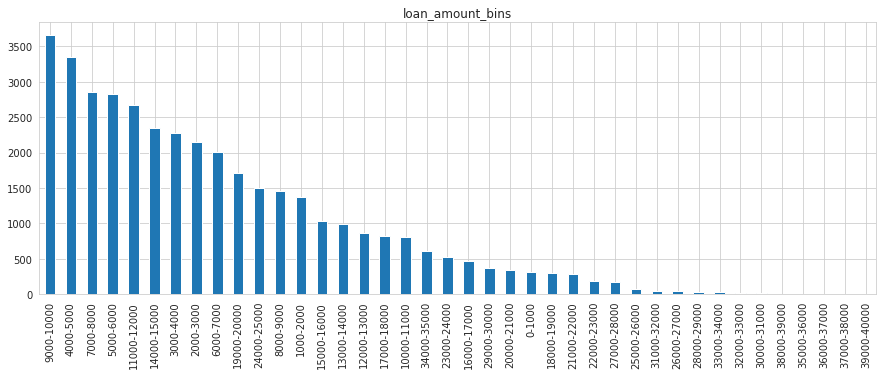

In [36]:
bins = np.linspace(0, 40000, 41)
range_label = []
for i in range(0,40000,1000): # Bins at 1000 interval
    range_label.append(str(str(i)+'-'+str(i+1000)))
df['loan_amount_bins'] = pd.cut(df['loan_amnt'], bins ,labels=range_label)
plt.figure(figsize = (15,5))
plt.title("loan_amount_bins")
df.loan_amount_bins.value_counts().plot(kind = 'bar') # Plotting barplot
plt.xticks(rotation=90)
plt.show()
list_categorical.append('loan_amount_bins')

<font color='blue'> Insight : Loan amount range for maximum loan count is 9000-10000. </font>

Plotting beans for funded amount

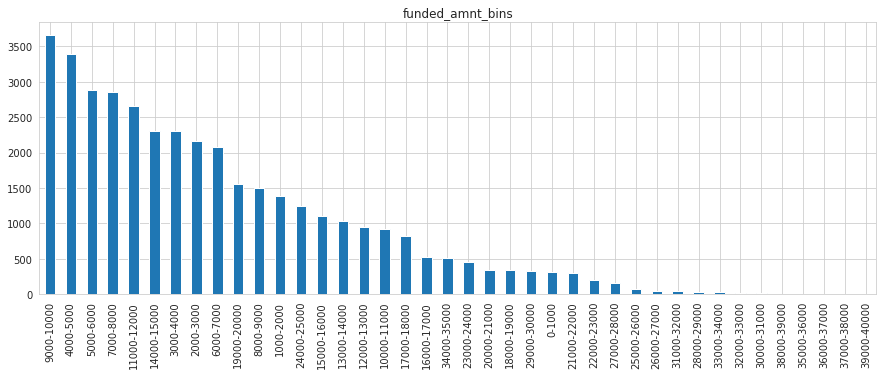

In [37]:
bins = np.linspace(0, 40000, 41)
range_label = []
for i in range(0,40000,1000): # Bins at 1000 interval
    range_label.append(str(str(i)+'-'+str(i+1000))) 
df['funded_amnt_bins'] = pd.cut(df['funded_amnt'], bins ,labels=range_label)
plt.figure(figsize = (15,5))
plt.title("funded_amnt_bins")
df.funded_amnt_bins.value_counts().plot(kind = 'bar') # Plotting barplot
plt.xticks(rotation=90)
plt.show()
list_categorical.append('funded_amnt_bins')

<font color='blue'> Insight : Maximum count of funded amount range by LC is 9000-10000. </font>

Plotting bins for funded_amnt_inv

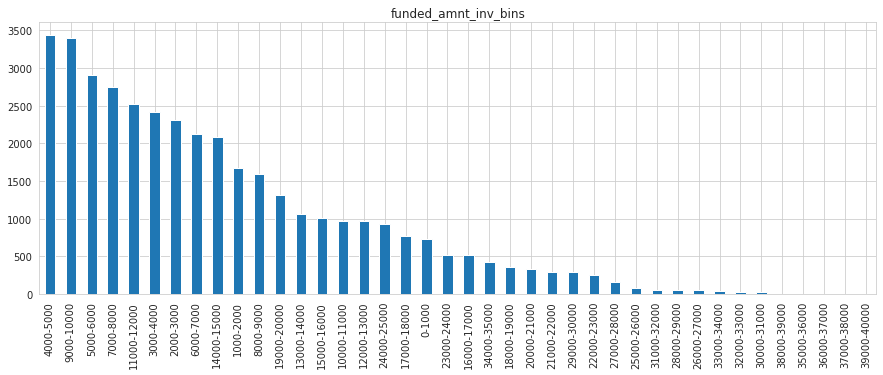

In [38]:
bins = np.linspace(0, 40000, 41)
range_label = []
for i in range(0,40000,1000): # Bins at 1000 interval
    range_label.append(str(str(i)+'-'+str(i+1000))) 
df['funded_amnt_inv_bins'] = pd.cut(df['funded_amnt_inv'], bins ,labels=range_label)
plt.figure(figsize = (15,5))
plt.title("funded_amnt_inv_bins")
df.funded_amnt_inv_bins.value_counts().plot(kind = 'bar') # Plotting barplot
plt.xticks(rotation=90)
plt.show()
list_categorical.append('funded_amnt_inv_bins')

<font color='blue'> Insight : Maximum count of amount approved by investor is 4000-5000 </font>

Drawing plot of annual income bins

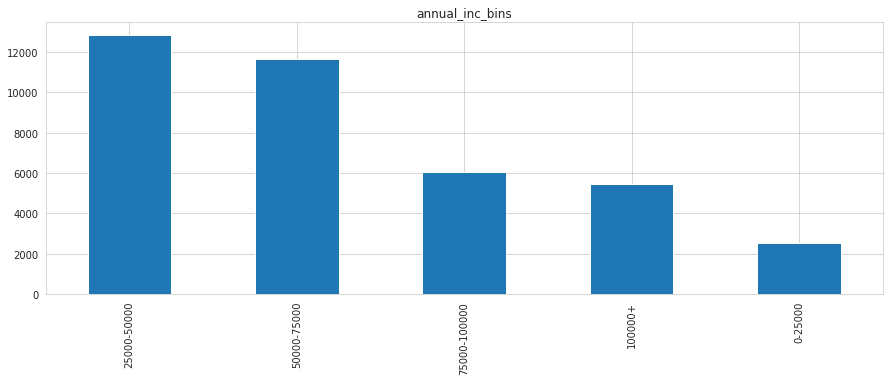

In [39]:
bins = np.append(np.linspace(0, 100000, 5),1000000)
range_label = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
df['annual_inc_bins'] = pd.cut(df['annual_inc'], bins, labels=range_label)
plt.figure(figsize = (15,5))
plt.title("annual_inc_bins")
df.annual_inc_bins.value_counts().plot(kind = 'bar') # Plotting barplot
plt.xticks(rotation=90)
plt.show()
list_categorical.append('annual_inc_bins')

<font color='blue'> Insight : Borrowers with  annual income between 25000-50000 applies for maximum loan.</font>

Plotting bins for interest rate

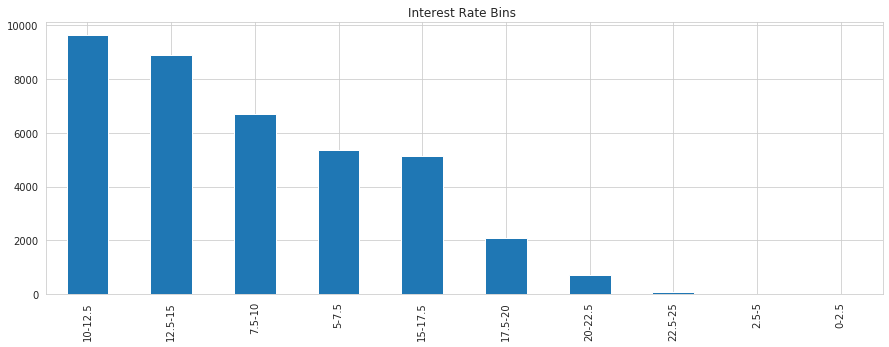

In [40]:
bins = np.linspace(0,25,11)
range_label = ['0-2.5','2.5-5','5-7.5','7.5-10','10-12.5','12.5-15','15-17.5','17.5-20','20-22.5','22.5-25']
df['int_rate_bins'] = pd.cut(df['int_rate'], bins, labels=range_label,right=False)
plt.figure(figsize = (15,5))
plt.title("Interest Rate Bins ")
df.int_rate_bins.value_counts().plot(kind = 'bar')
plt.xticks(rotation=90)
plt.show()
list_categorical.append('int_rate_bins')

<font color='blue'> Insight : Max count of interest rate range applied on Loans is 10-12.5. </font>

##### 3.4 Bivariate Analysis drawing correlation between various attributes 

Finding correlation between various continous variable by drawing heat map

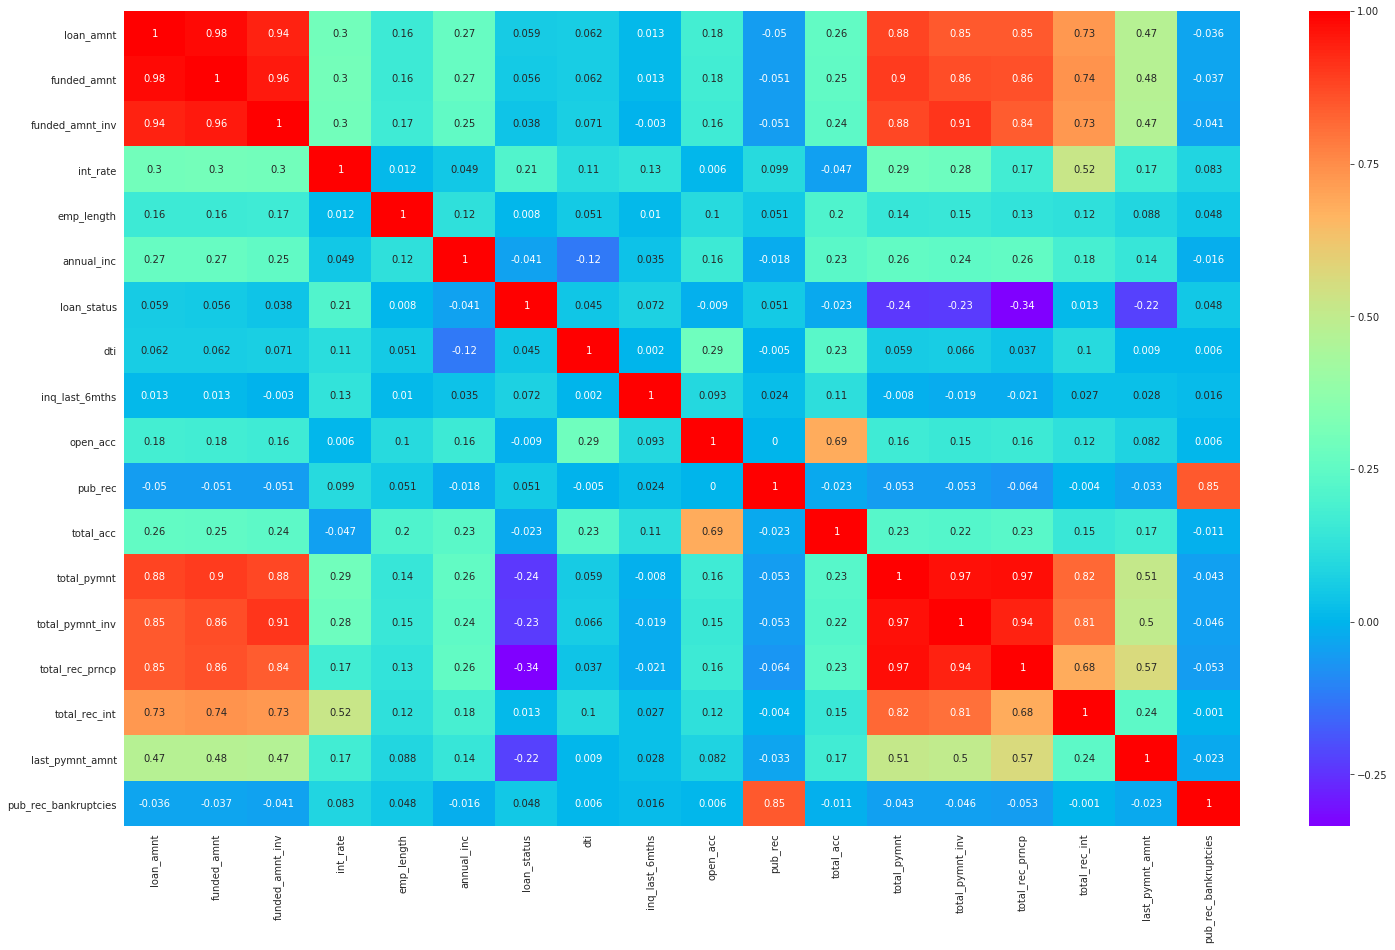

In [41]:
cor = round(df.corr(),3)
# figure size
plt.figure(figsize=(25,15))
# heatmap
ax = sns.heatmap(cor, cmap = "rainbow", annot=True)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.show()

<font color='blue'> Insight : Above heat map shows that loan_amt,funded_amt,funded_amt_inv are highly correlated.
It implies that investors lend approx 94 percent of the loan amount claimed by borrower. </font>

##### 3.5 Bivarate analysis for categorical variables with rate of charge off

Rate of charge off can be obtained dividing Number of chargeoff by Total no of loans

In [42]:
def bivariate_analysis_categorical(column_name):
    tmp_df = df.groupby([column_name,'loan_status'])
    result = []
    for item in set(df[column_name]):
        tmp = {}
        tmp[column_name] = item
        tmp['charged_off_count'] = 0
        tmp['fully_paid_count'] = 0
        result.append(tmp) # Adding initial value in result list 
    for key,item in tmp_df:
        for value in result:
            if(value[column_name]==key[0] and key[1]==1):
                value['charged_off_count'] = len(item) # Finding 1 i.e charged off count
            elif(value[column_name]==key[0] and key[1]==0):
                value['fully_paid_count'] = len(item) # Finding 0 i.e fully paid count
    result_df = pd.DataFrame(result)
    result_df['total_loan_count'] = (result_df.charged_off_count+result_df.fully_paid_count)
    result_df['charged_off_rate'] = result_df.charged_off_count/result_df.total_loan_count
    result_df.sort_values(by=['charged_off_rate'] , inplace=True , ascending=False)
    # set figure size for larger figure
    plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
    # specify hue="categorical_variable"
    sns.barplot(x=column_name, y='charged_off_rate',data=result_df)
    plt.xticks(rotation=90)
    plt.show()

In [43]:
list_categorical.remove('loan_status') # Not needed as we are comparing with this column
list_categorical.remove('issue_d') # Not needed as we already have column with year and month

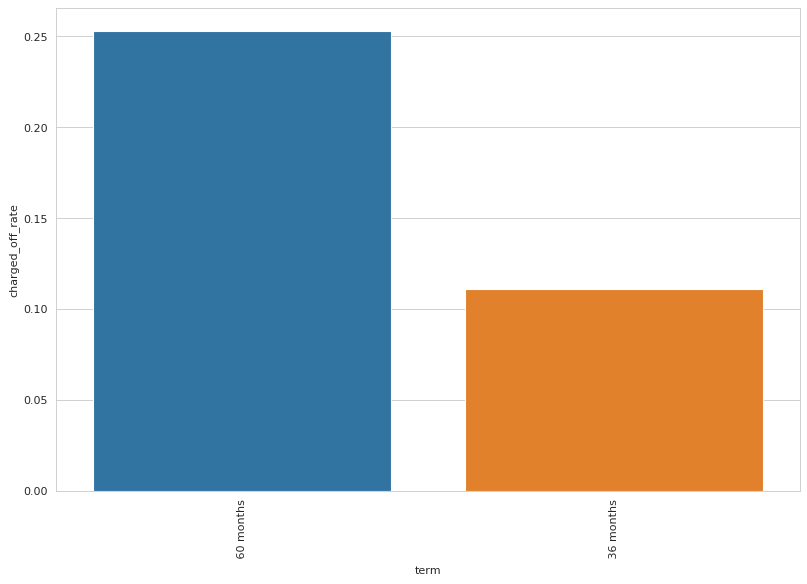

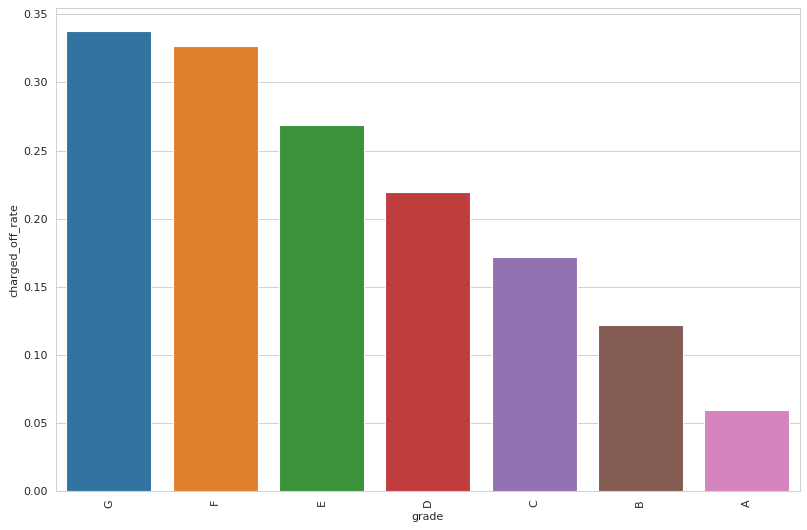

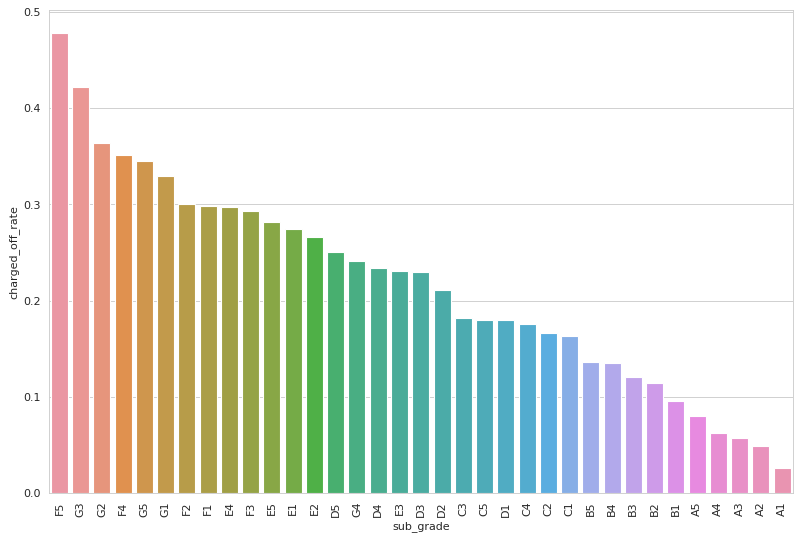

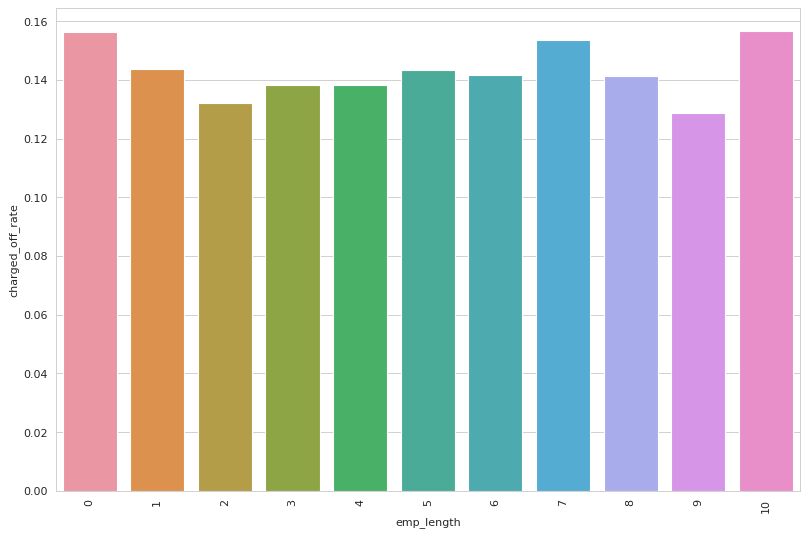

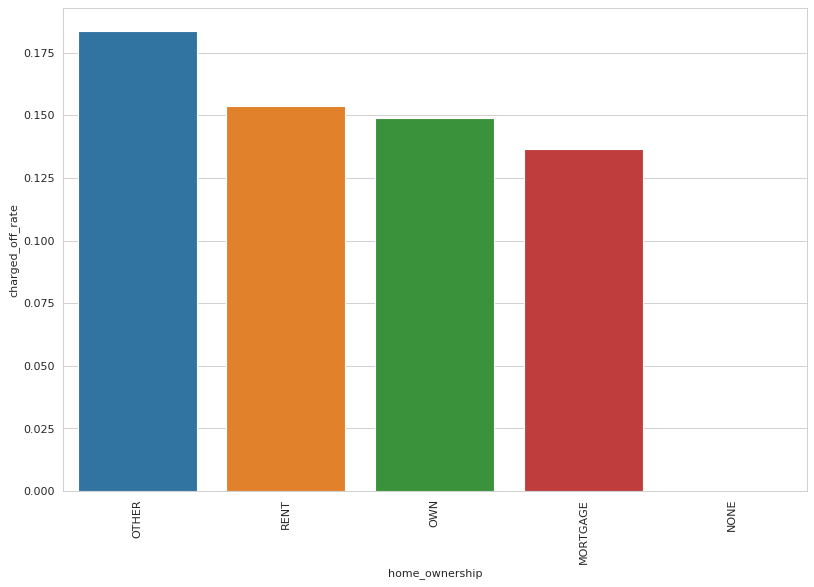

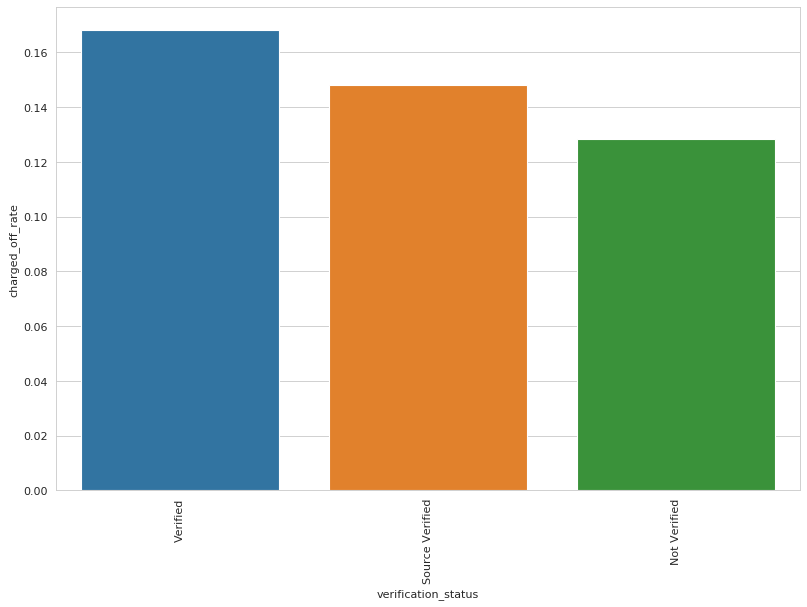

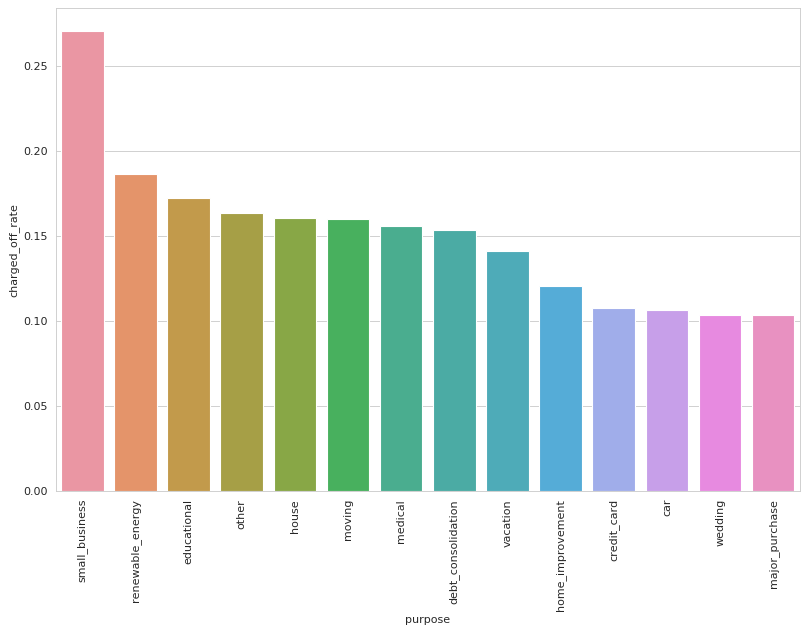

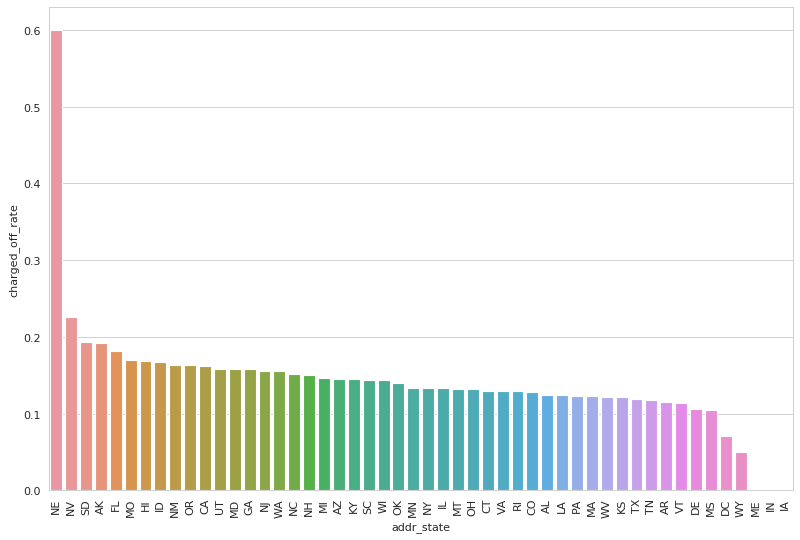

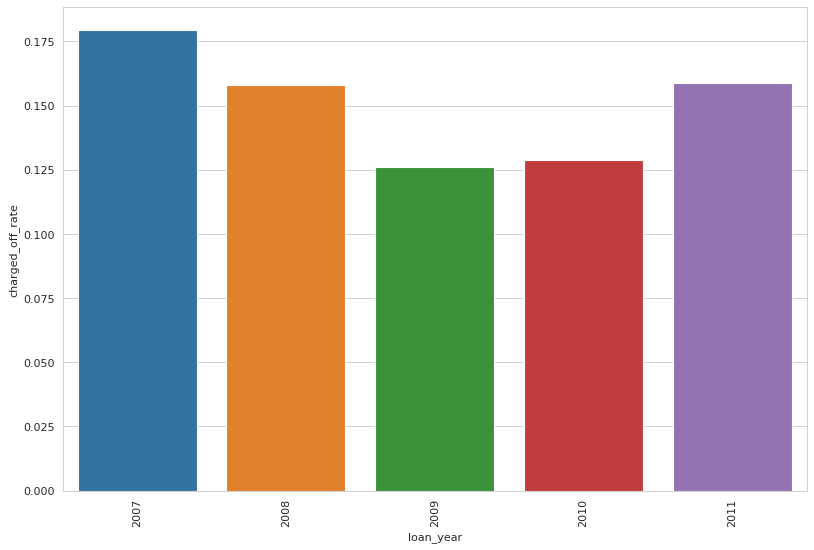

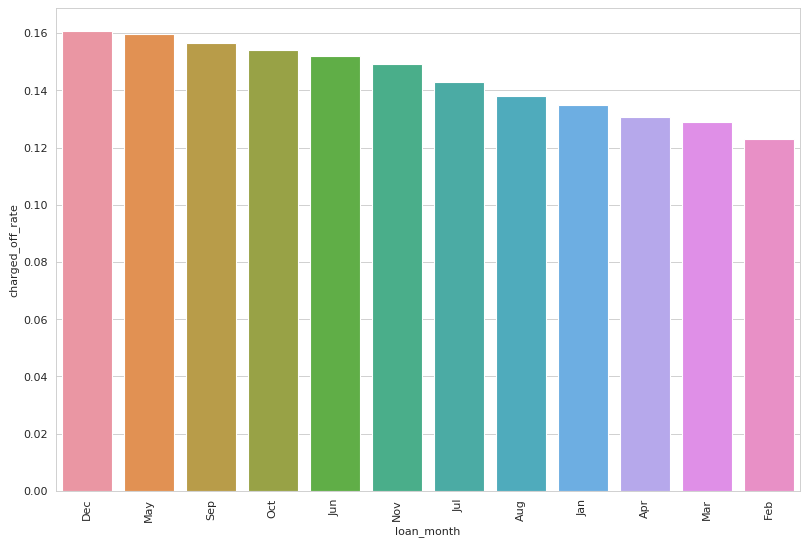

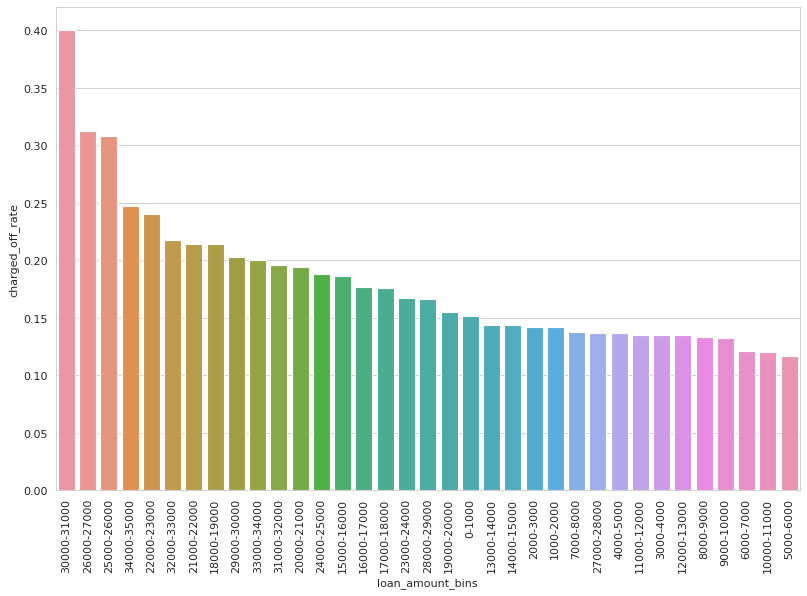

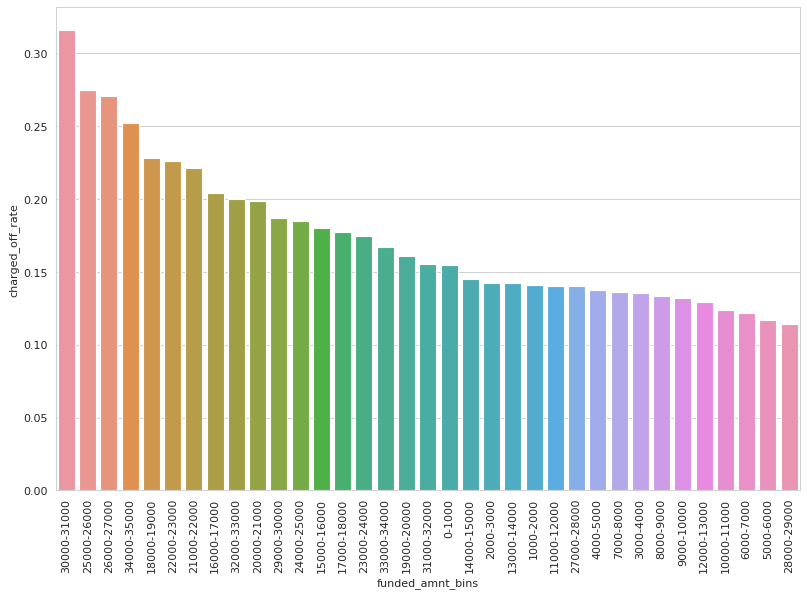

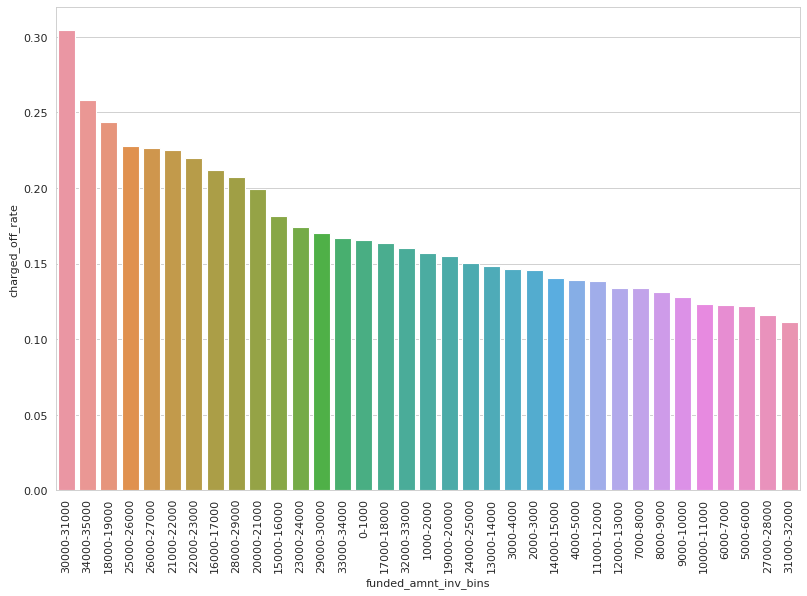

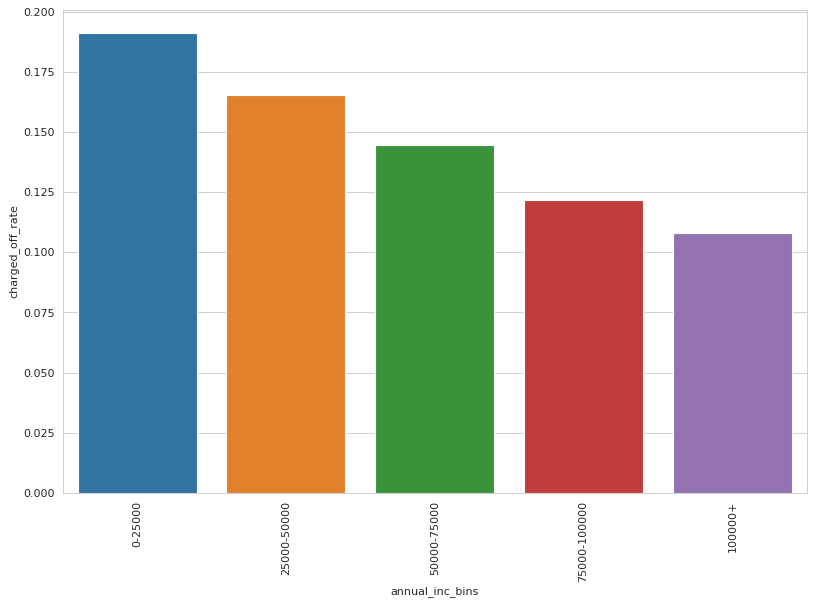

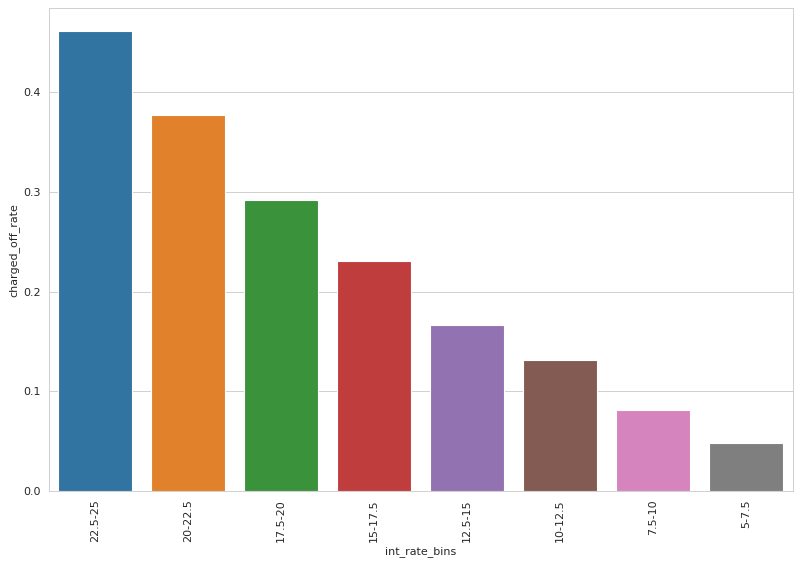

In [44]:
for i in list_categorical:
    bivariate_analysis_categorical(i) # Drawing bivariate analysis for categorical variables recursively
# bivariate_analysis_categorical('grade')

<font color='blue'> Insight : Analysis for above plots<br>
1)default rate for 60 months is more than 36 months<br>
2)Loan with grade G has maximum default rate<br>
3)Sub_garde F5 has maximum default rate<br>
4)Loan for 'others'has highest default rate<br>
5)Verified loans has more chances of default<br>
6)Loan taken for small_business has more default rate<br>
7)State NE has more default rate compared to other states<br>
8)Year 2007 has more default rate<br>
9)Decemeber month has more default rate compared to other months<br>
10)Loan amount and funded amt_inv between 30000-31000 has maximum default rate<br>
11)Borrowers with annual income between 0-25000 has maximum charged off rate<br>
12)High interest rate between 22.5 to 25 is more likely to default<br> </font>

In [45]:
def plot_bivariate_two_variables(column_x,column_hue):
    '''Function to plot graph of two attributes with charged off rate'''
    tmp_df = df.groupby([column_hue,column_x,'loan_status'])
    result = []
    for item in set(df[column_hue]):
        for i in set(df[column_x]):
            tmp = {}
            tmp[column_hue] = item
            tmp[column_x] = i
            tmp['charged_off_count'] = 0
            tmp['fully_paid_count'] = 0
            result.append(tmp)
    for key,item in tmp_df:
        for value in result:
            if(value[column_hue]==key[0] and value[column_x]==key[1] and key[2]==1):
                value['charged_off_count'] = len(item)
            if(value[column_hue]==key[0] and value[column_x]==key[1] and key[2]==0):
                value['fully_paid_count'] = len(item)
    result_df = pd.DataFrame(result)
    result_df['total_loan_count'] = (result_df.charged_off_count+result_df.fully_paid_count)
    result_df['charged_off_rate'] = result_df.charged_off_count/result_df.total_loan_count
    result_df.sort_values(by=['charged_off_rate'] , inplace=True , ascending=False)
    # set figure size for larger figure
    plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
    # specify hue="categorical_variable"
    sns.barplot(x=column_x, y='charged_off_rate',hue=column_hue,data=result_df)
    plt.xticks(rotation=90)
    plt.show()

##### 3.6 Bivariate Analysis for grade ,term with charged off probablity

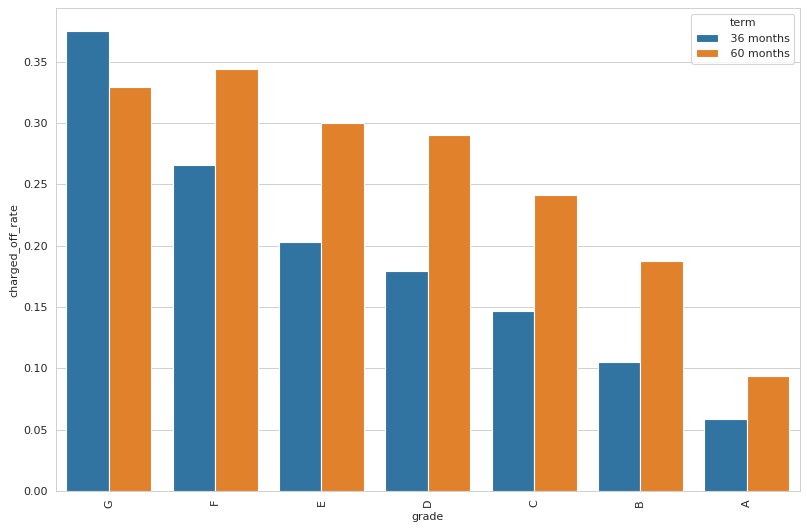

In [46]:
plot_bivariate_two_variables('grade','term') # Calling plot function

<font color='blue'> Insight : Grade G with loan term 36 months has more charged off rate. </font>

##### 3.7 Bivariate Analysis for purpose ,term with charged off probablity

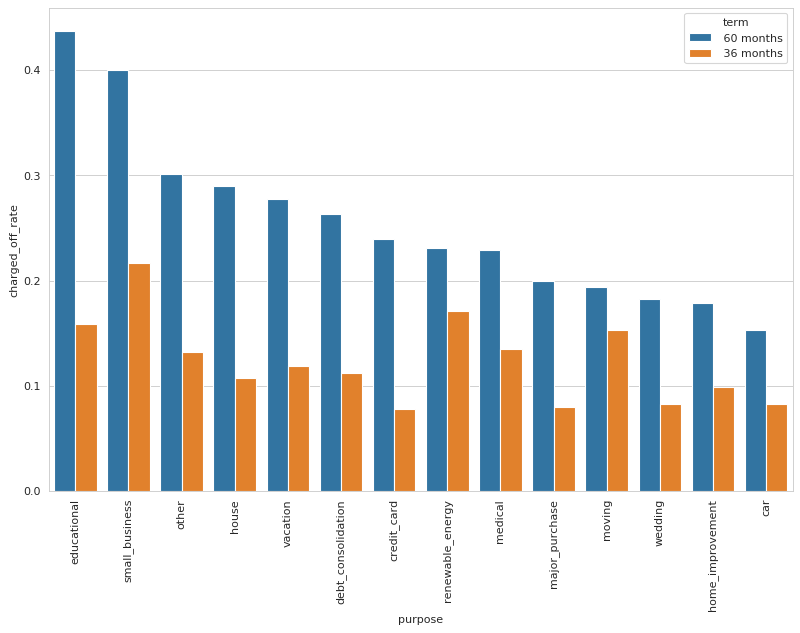

In [47]:
plot_bivariate_two_variables('purpose','term') # Calling plot function

<font color='blue'> Insight : Loan for educational purpose with 60 months term has maximum default rate. </font>

##### 3.8 Bivariate Analysis for int_rate_bins ,purpose with charged off probablity

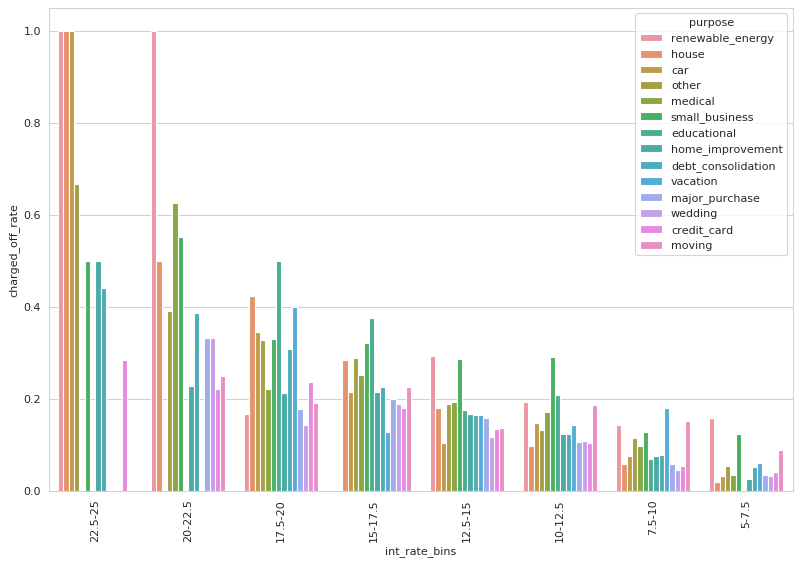

In [48]:
plot_bivariate_two_variables('int_rate_bins','purpose') # Calling plot function

<font color='blue'> Insight : Loan for car,house and renewable energy with interest rate range 22.5-25 has maximum default rate. </font>

##### 3.9 Bivariate Analysis for loan_year ,purpose with charged off probablity

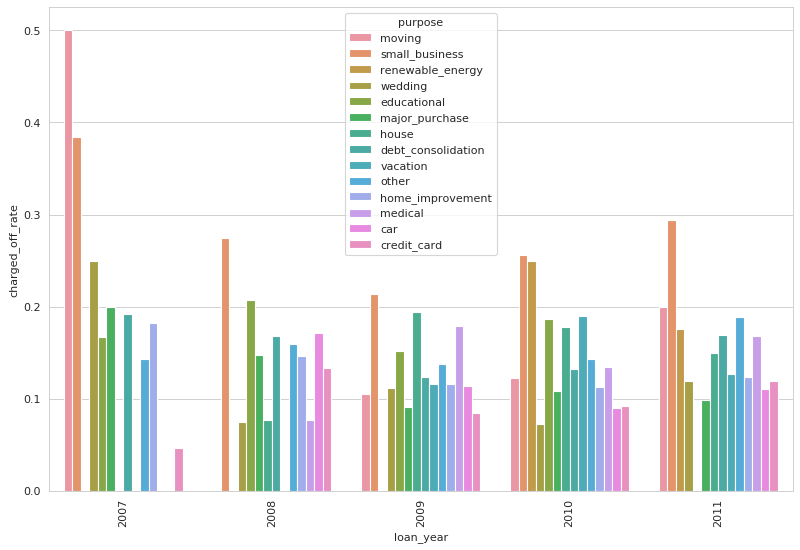

In [49]:
plot_bivariate_two_variables('loan_year','purpose') # Calling plot function

<font color='blue'> Insight : Loan in year 2007 for moving purpose has maximum default rate </font>

##### 3.10 Bivariate Analysis for int_rate_bins ,loan_year with charged off probablity

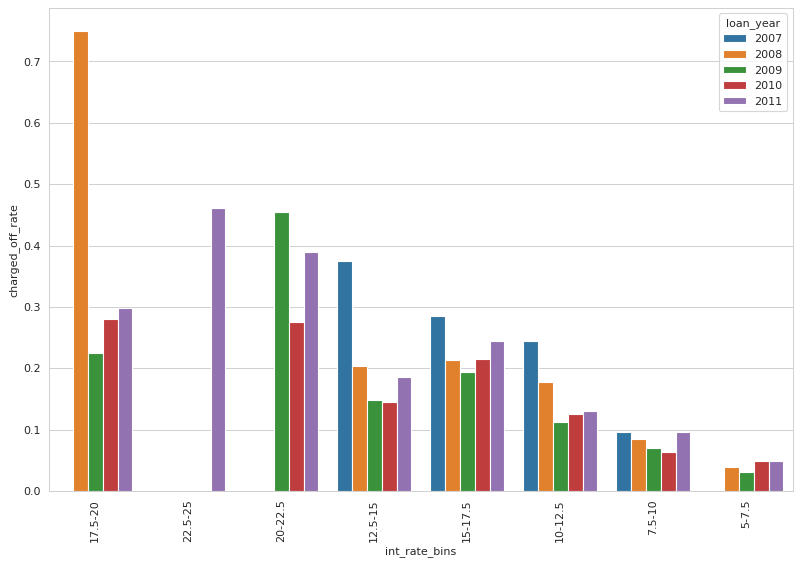

In [50]:
plot_bivariate_two_variables('int_rate_bins','loan_year') # Calling plot function

<font color='blue'> Insight : Interest rate between 17.5-20 in loan year 2008 has maximum default rate. </font>

##### 3.11 Bivariate Analysis for int_rate_bins ,home_ownership with charged off probablity

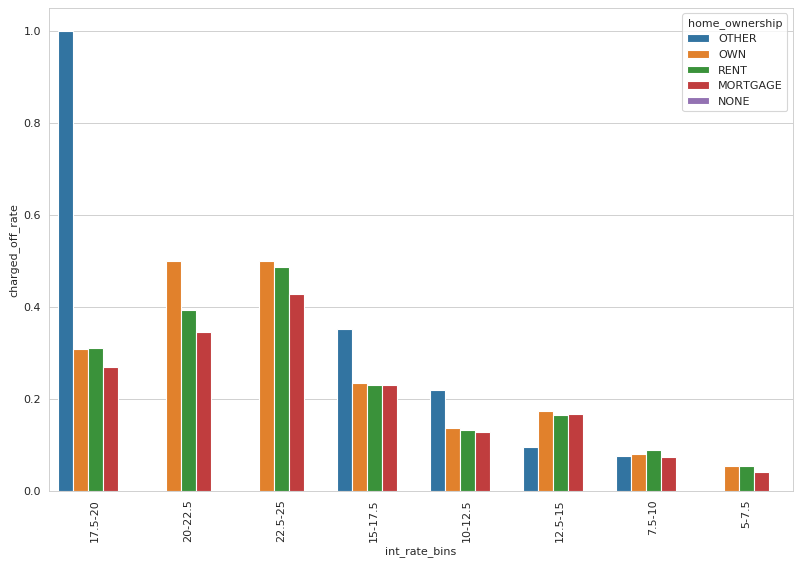

In [51]:
plot_bivariate_two_variables('int_rate_bins','home_ownership') # Calling plot function

<font color='blue'> Insight : Interest rate between 17.5-20 for home ownership 'other' has highest default rate </font>

##### 3.12 Bivariate Analysis for int_rate_bins ,term with charged off probablity

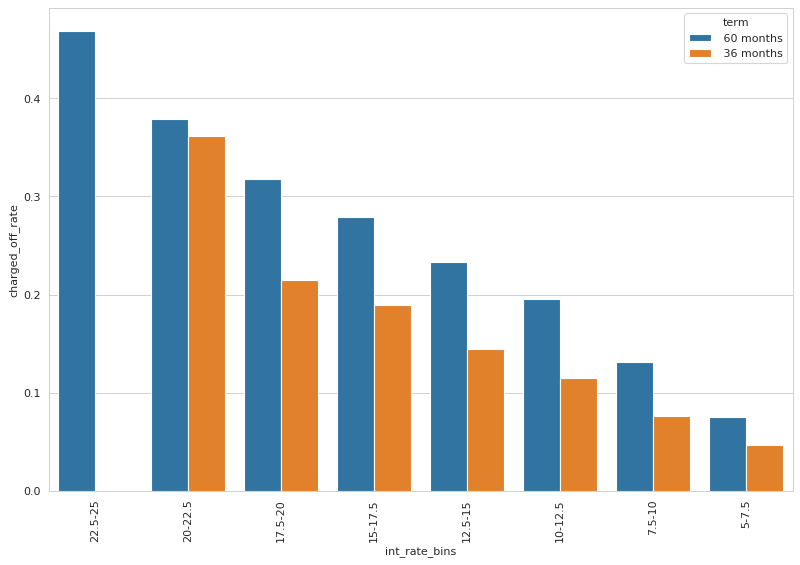

In [52]:
plot_bivariate_two_variables('int_rate_bins','term') # Calling plot function

<font color='blue'> Insight : Interest rate between 22.5-25 for 60 months term has maximum default rate.</font>